## 1. Load data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [4]:
df_customer=pd.read_csv(r"C:\Users\Admin\Documents\Tự học DA\Data Maz Python\movie_ticket_data\movie_ticket_data\customer.csv")
df_campaign=pd.read_csv(r"C:\Users\Admin\Documents\Tự học DA\Data Maz Python\movie_ticket_data\movie_ticket_data\campaign.csv")
df_device=pd.read_csv(r"C:\Users\Admin\Documents\Tự học DA\Data Maz Python\movie_ticket_data\movie_ticket_data\device_detail.csv")
df_status=pd.read_csv(r"C:\Users\Admin\Documents\Tự học DA\Data Maz Python\movie_ticket_data\movie_ticket_data\status_detail.csv")
df_ticket=pd.read_csv(r"C:\Users\Admin\Documents\Tự học DA\Data Maz Python\movie_ticket_data\movie_ticket_data\ticket_history.csv")

##  2. Data Cleaning


### 2.1 Data type, null values, duplicate

In [5]:
# Bảng Customer
df_customer.info()
# Chuyển data type dob thành datetime
df_customer['dob']=pd.to_datetime(df_customer['dob'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [6]:
df_customer.nunique()
# Customer Id unique, không có duplicate

customer_id    131400
usergender          3
dob             11640
dtype: int64

In [7]:
# Bảng Campaign
df_campaign.info()
df_campaign.head()
df_campaign.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


campaign_id      216
campaign_type      3
dtype: int64

In [8]:
# Bảng Device
df_device.info()
df_device.head()
df_device.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


device_number    139901
model              1260
platform              2
dtype: int64

In [9]:
# Tỷ lệ null bao nhiêu %
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [10]:
# Thay thể null trong model thành UNKNOWN
df_device=df_device.fillna({'model':'unknown'})
# Xóa giá trị null trong device number
df_device=df_device[df_device['device_number'].notna()]

In [11]:
#Bảng Status
df_status.info()
df_status.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,customer


In [12]:
# Bảng Ticket
df_ticket.head()
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [13]:
#Thay đổi data type cột time
df_ticket['time']=pd.to_datetime(df_ticket['time'])

In [14]:
calc_null_rate(df_ticket)

,null_count,null_rate
ticket_id,0,0.0
customer_id,0,0.0
paying_method,0,0.0
theater_name,0,0.0
device_number,0,0.0
original_price,0,0.0
discount_value,0,0.0
final_price,0,0.0
time,0,0.0
status_id,0,0.0


In [15]:
df_ticket.nunique()
# Ticket_id có duplicate
df_ticket[df_ticket.duplicated(keep=False)]
df_ticket.drop_duplicates(inplace=True)


In [16]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


### 2.2 Join tables

In [17]:
df_join_customer = pd.merge(df_ticket, df_customer, how='left', on= 'customer_id')
df_join_campaign=pd.merge(df_join_customer,df_campaign, how='left',on='campaign_id')
df_join_status=pd.merge(df_join_campaign, df_status, how='left', on='status_id')
df_join_all=pd.merge(df_join_status, df_device, how='left', on='device_number')

In [18]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,NaN,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,NaN,browser,website
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,NaN,Order successful,NaN,unknown,mobile
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,NaN,devicemodel,mobile
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,NaN,devicemodel,mobile


In [19]:
calc_null_rate(df_join_all)
# error_groupt null vì những đơn hàng thành công không có mã lỗi --> bình thường
# Campaign_type null vì những đơn hàng này phát sinh không trong chương trình khuyễn mãi --> bình thường


,null_count,null_rate
error_group,133679,0.863978
campaign_type,63098,0.407807
platform,78,0.000504
model,78,0.000504
paying_method,0,0.000000
ticket_id,0,0.000000
customer_id,0,0.000000
theater_name,0,0.000000
device_number,0,0.000000
original_price,0,0.000000


In [20]:
# Thay thế các giá trị null thành unknown
df_join_all=df_join_all.fillna('unknown')

### 2.3 View all value of each column

In [21]:
df_join_all.nunique().sort_values(ascending=False)

ticket_id         154725
time              154725
device_number     126459
customer_id       119477
dob                11322
final_price         2715
original_price      1895
model               1215
movie_name           253
discount_value       242
campaign_id          211
theater_name         179
status_id              8
description            8
paying_method          5
error_group            4
campaign_type          4
usergender             3
platform               3
dtype: int64

In [22]:
# Liệt kê giá trị unique các cột
specific_cols = ['movie_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r')
    print('--------------------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

## 3. Analyze

### 3.1 Customer portrait

Age and gender distribution

In [23]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile


In [24]:
# Tính tuổi của khách hàng từ DOB
current_date=datetime.now()
current_date

df_join_all['age_days']=(current_date-df_join_all['dob']).dt.days
df_join_all['age']=(df_join_all['age_days']/365.25).astype(int)

In [25]:
# Lấy ra danh sách về tuổi, giới tính của tập khách hàng hiện tại
df_cus=df_join_all.drop_duplicates(subset=['customer_id'])[['customer_id','dob','age','usergender']]
df_cus.info()


<class 'pandas.core.frame.DataFrame'>
Index: 119477 entries, 0 to 154724
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  119477 non-null  int64         
 1   dob          119477 non-null  datetime64[ns]
 2   age          119477 non-null  int64         
 3   usergender   119477 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


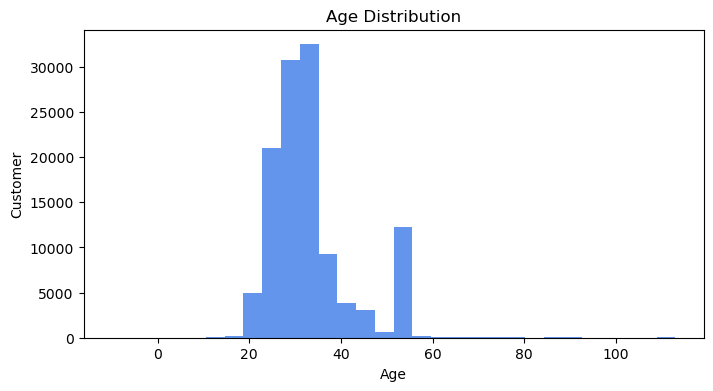

In [26]:
# Phân bổ khách hàng theo độ tuổi
plt.figure(figsize=(8,4))
df_cus['age'].hist(bins = 30, color='cornflowerblue', grid=False)
plt.xlabel('Age')
plt.ylabel('Customer')
plt.title('Age Distribution')
plt.show()


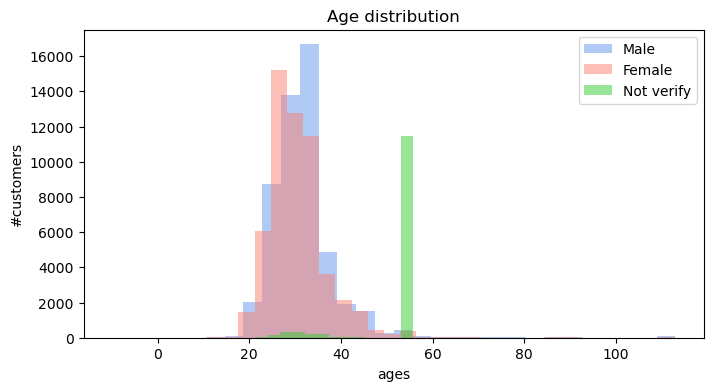

In [27]:
# Phân bổ độ tuổi theo nhóm giới tính :
plt.figure(figsize=(8,4))

## data
male_age = df_cus[df_cus['usergender'] == 'Male']['age']
female_age = df_cus[df_cus['usergender'] == 'Female']['age']
unknown_age = df_cus[df_cus['usergender'] == 'Not verify']['age']

## plot
plt.hist(male_age, bins=30, alpha = 0.5, color = 'cornflowerblue', label = 'Male')
plt.hist(female_age, bins=30, alpha = 0.5, color = 'salmon', label = 'Female')
plt.hist(unknown_age, bins=30, alpha = 0.5, color = 'limegreen', label = 'Not verify')

##edit
plt.title('Age distribution')
plt.xlabel('ages')
plt.ylabel('#customers')
plt.legend()
plt.show()


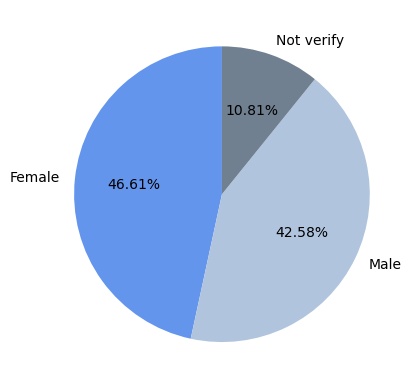

In [28]:
# Đi vào chi tiết nhóm not verify 
df_gen=df_cus.groupby('usergender').agg(total=('customer_id','count')).sort_values(by='total', ascending=False).reset_index()
plt.pie(df_gen['total'], labels=df_gen['usergender'], colors=['cornflowerblue','lightsteelblue','slategrey'], autopct='%1.2f%%',startangle=90 )
plt.show()
# Nhóm khách hàng Not Verify chiếm gần 11% , lý do
    # Không nhập thông tin dob --> default 1970

In [29]:
df_cus[df_cus['usergender']=='Not verify'].groupby('age').agg(number=('customer_id','count')).reset_index().sort_values(by='number', ascending=False).head(10)

,age,number
39,55,11435
14,30,135
11,27,120
13,29,110
12,28,110
15,31,109
17,33,106
16,32,105
19,35,92
10,26,88


In [30]:
# Phân loại X, Y, Z, Older
df_cus['age_generation']=df_cus['dob'].apply(lambda x: 'baby boomers' if x.year<1965 else 'gen X' if x.year<1981 else 'gen Y' if x.year<1997 else 'gen Z')

In [31]:
df_gen_group= (df_cus[df_cus['usergender']!='Not verify']
.groupby('age_generation')
.agg(total = ('customer_id','count'))
.sort_values(by='total', ascending=False )
.reset_index()
)

In [32]:
df_gen_group


,age_generation,total
0,gen Y,63310
1,gen Z,38401
2,gen X,4261
3,baby boomers,590


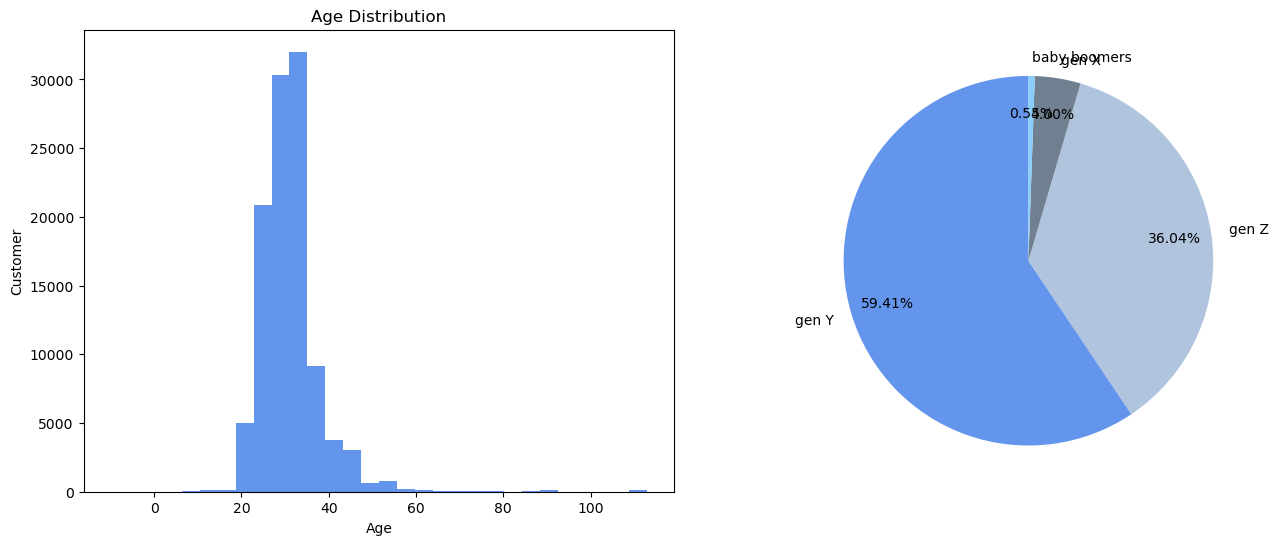

In [33]:
# Kết hợp biểu đồ 
plt.figure(figsize=(16, 6))  # tăng width lên
plt.subplots_adjust(wspace=0.1)
# plot1
ax1 = plt.subplot( 1, 2, 1)
df_cus[df_cus['usergender']!='Not verify']['age'].hist(bins = 30, color='cornflowerblue', grid=False)
plt.xlabel('Age')
plt.ylabel('Customer')
plt.title('Age Distribution')

ax2 = plt.subplot( 1, 2, 2)
plt.pie(df_gen_group['total'], labels=df_gen_group['age_generation'], colors=['cornflowerblue','lightsteelblue','slategrey','lightskyblue'], autopct='%1.2f%%',startangle=90, pctdistance=0.8 )

plt.show()


### 3.2 Time series data - When đi customer buy tickets?

Trend by month

In [34]:
df_join_all['month']=pd.to_datetime(df_join_all['time']).dt.month
df_join_all['weekday']=pd.to_datetime(df_join_all['time']).dt.day_name()
df_join_all['hour']=pd.to_datetime(df_join_all['time']).dt.hour
df_join_all['year_month']=pd.to_datetime(df_join_all['time']).dt.strftime('%Y-%m')

In [35]:
# Thống kê theo tháng
df_time_month= (
    df_join_all
    .groupby('year_month')
    .agg(total_ticket=('ticket_id','count'))
    .reset_index()
)

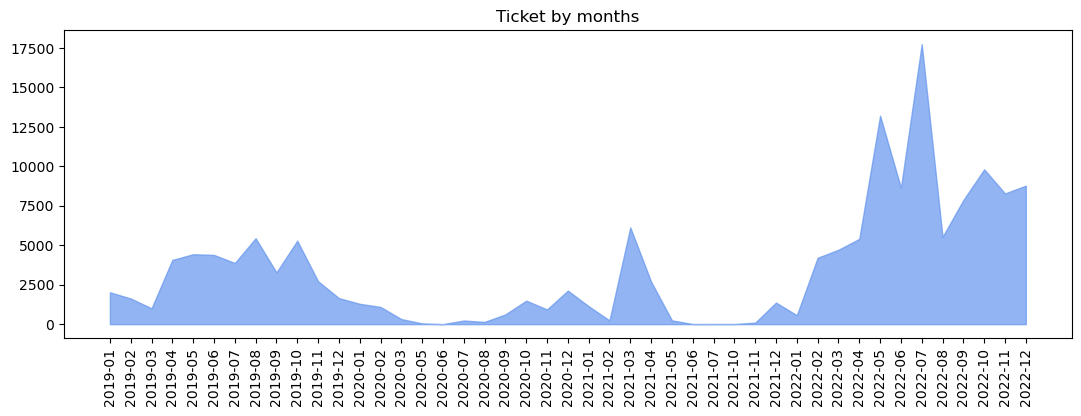

In [36]:
# Vẽ biểu đồ miền theo tháng
plt.figure(figsize=(13,4))
plt.fill_between(df_time_month['year_month'],df_time_month['total_ticket'], color='cornflowerblue', alpha=0.7)
plt.title('Ticket by months')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Giai đoạn Covid
# Cần một bảng dim thời gian theo tháng có đủ các cột mốc

In [38]:
# Tạo bảng dimension thời gian:

# Xác định khoảng thời gian
start_date = '2019-01-01'
end_date = '2022-12-31'

# Tạo ra range thời gian từ 2 mốc start và end
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Lấy ra list phần tử thời gian tương ứng:
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

# # Khởi tạo dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})


In [39]:
# Join để có đủ các mốc thời gian
df_time_month_dim=(
    pd.merge(dim_time, df_join_all, how='left', on ='year_month').
    groupby('year_month')
    .agg(total_ticket=('ticket_id','count'))
    .reset_index()
)
df_time_month_dim.replace(0, np.nan, inplace=True)

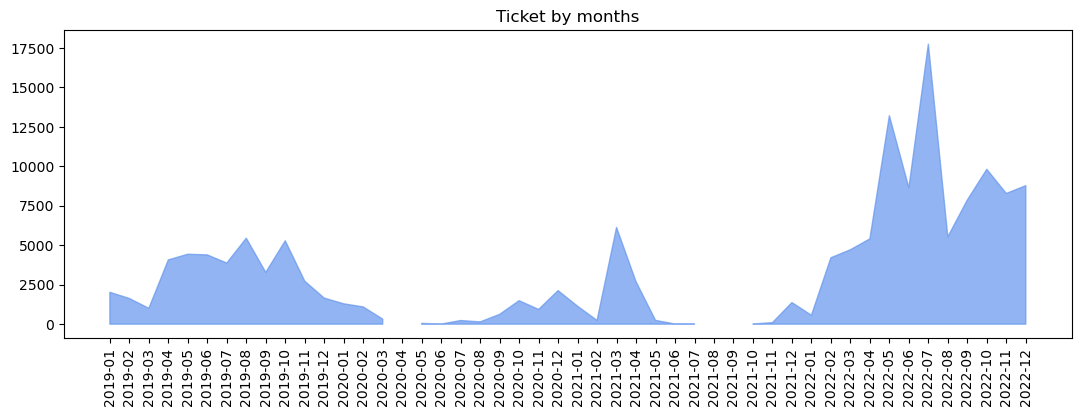

In [40]:
plt.figure(figsize=(13,4))
plt.fill_between(df_time_month_dim['year_month'],df_time_month_dim['total_ticket'], color='cornflowerblue', alpha=0.7)
plt.title('Ticket by months')
plt.xticks(rotation=90)
plt.show()

Trend by weekday

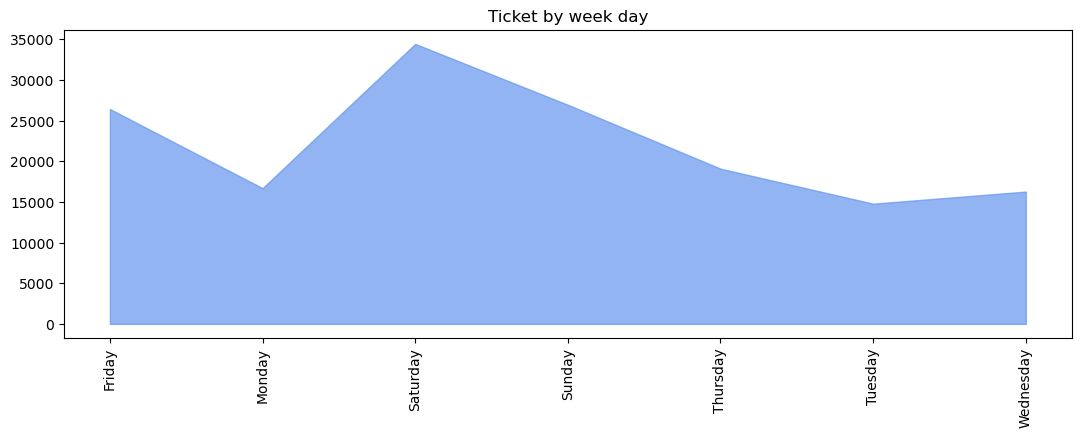

In [41]:
df_week_day=df_join_all.groupby('weekday').agg(total_ticket=('ticket_id','count')).reset_index()
df_week_day
plt.figure(figsize=(13,4))
plt.fill_between(df_week_day['weekday'],df_week_day['total_ticket'], color='cornflowerblue', alpha=0.7)
plt.title('Ticket by week day')
plt.xticks(rotation=90)
plt.show()

In [42]:
# Sắp xếp thứ tự các ngày trong tuần
week_day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_week_day['day_order']=pd.Categorical(df_week_day['weekday'], categories=week_day_order, ordered=True)
df_week_day.sort_values('day_order', inplace=True)
df_week_day

,weekday,total_ticket,day_order
1,Monday,16702,Monday
5,Tuesday,14793,Tuesday
6,Wednesday,16281,Wednesday
4,Thursday,19101,Thursday
0,Friday,26438,Friday
2,Saturday,34450,Saturday
3,Sunday,26960,Sunday


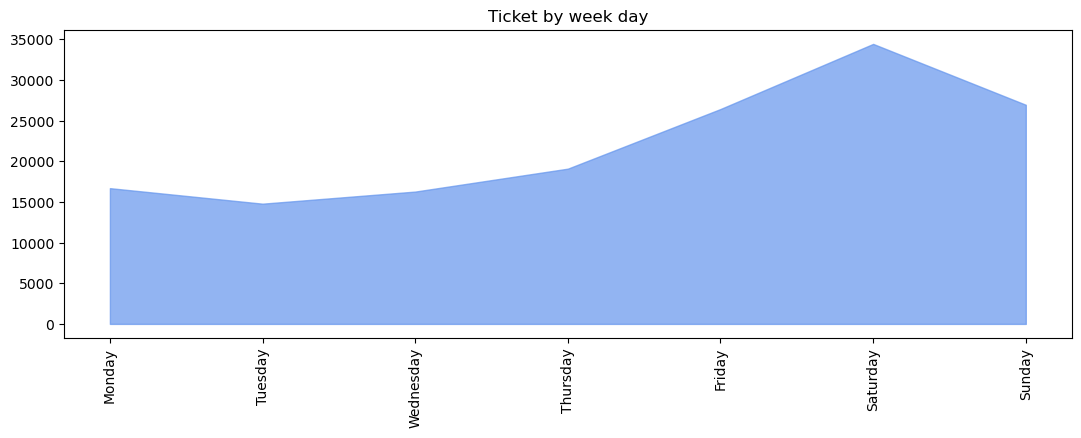

In [43]:

plt.figure(figsize=(13,4))
plt.fill_between(df_week_day['weekday'],df_week_day['total_ticket'], color='cornflowerblue', alpha=0.7)
plt.title('Ticket by week day')
plt.xticks(rotation=90)
plt.show()

Trend by hour

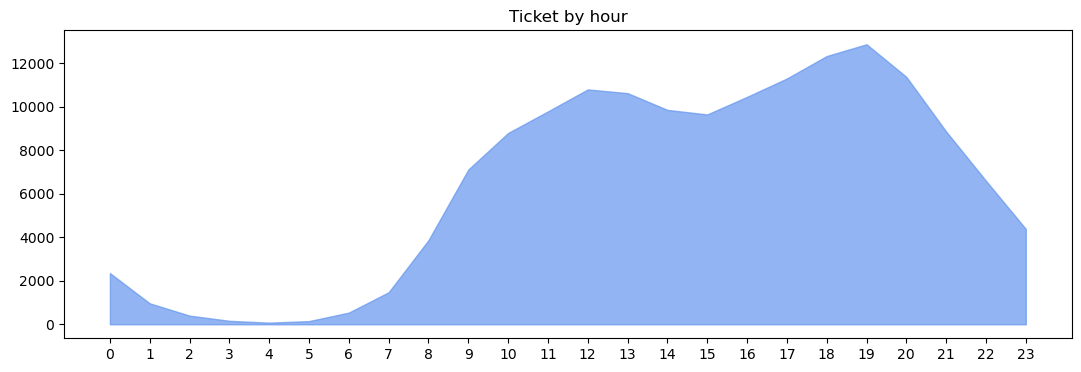

In [44]:
df_hour=df_join_all.groupby('hour').agg(total_ticket=('ticket_id','count')).reset_index()
df_hour
plt.figure(figsize=(13,4))
plt.fill_between(df_hour['hour'],df_hour['total_ticket'], color='cornflowerblue', alpha=0.7)
x_values=[i for i in range(24)]
plt.title('Ticket by hour')
plt.xticks(x_values)
plt.show()

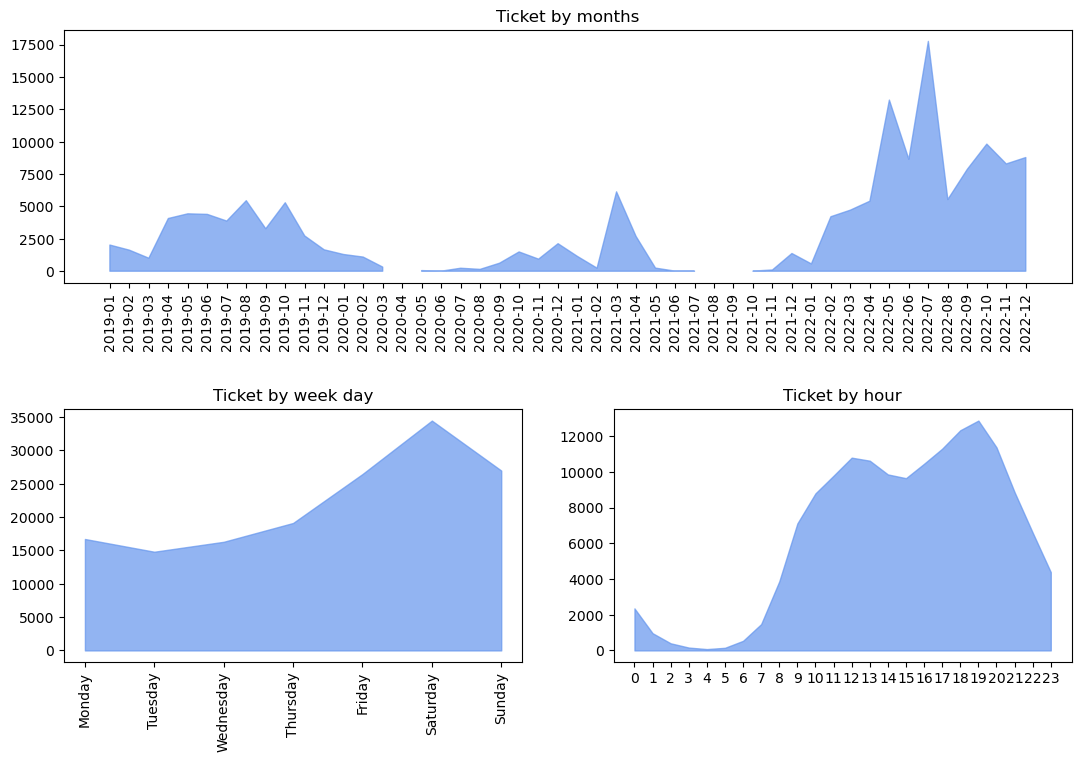

In [45]:
# Vẽ chung trên 1 frame
plt.figure(figsize=(13,8))
# Theo tháng
ax1=plt.subplot(2, 1,1)
plt.fill_between(df_time_month_dim['year_month'],df_time_month_dim['total_ticket'], color='cornflowerblue', alpha=0.7)
plt.title('Ticket by months')
plt.xticks(rotation=90)
# Theo ngày trong tuần
ax2=plt.subplot(2,2,3)
plt.fill_between(df_week_day['weekday'],df_week_day['total_ticket'], color='cornflowerblue', alpha=0.7)
plt.title('Ticket by week day')
plt.xticks(rotation=90)
# Theo giờ
ax3=plt.subplot(2,2,4)
plt.fill_between(df_hour['hour'],df_hour['total_ticket'], color='cornflowerblue', alpha=0.7)
x_values=[i for i in range(24)]
plt.title('Ticket by hour')
plt.xticks(x_values)

plt.subplots_adjust(hspace= 0.5, top =0.9)
plt.show()

### 3.3 Factors related to the customer's purchasing process

Payment platform

In [46]:
df_platform=df_join_all.groupby('platform').agg(total_ticket=('ticket_id','count')).reset_index()
df_platform=df_platform[df_platform['platform'] !='unknown']
df_platform

,platform,total_ticket
0,mobile,138136
2,website,16511


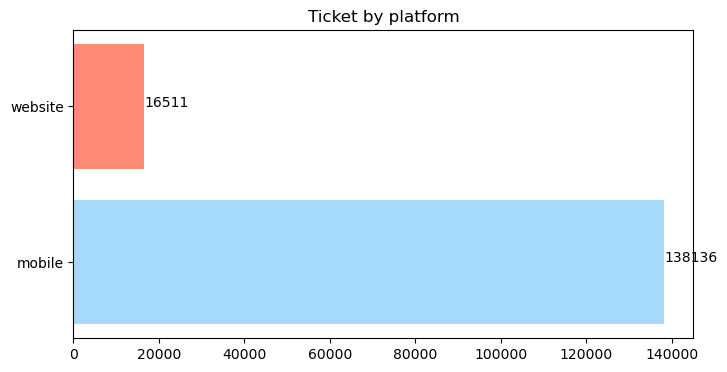

In [47]:
# Biểu đồ cột ngang
plt.figure(figsize=(8,4))
plt.barh(
    df_platform['platform'],
    df_platform['total_ticket'],
    color=df_platform['platform'].replace({'mobile':'lightskyblue', 'website':'tomato'}),
    alpha=0.75,
)
for index, value in enumerate(df_platform['total_ticket']):
    plt.text(value, index, str(value))
plt.title('Ticket by platform')
plt.show()

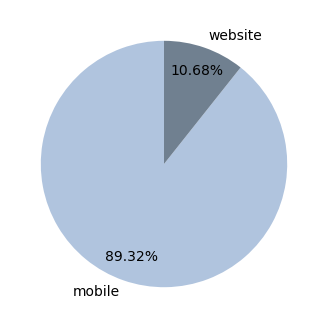

In [48]:
# Biểu đồ cột thể hiện tỷ trọng
plt.figure(figsize=(8,4))

plt.pie(df_platform['total_ticket'], labels=df_platform['platform'], colors=['lightsteelblue','slategrey'], autopct='%1.2f%%',startangle=90, pctdistance=0.8 )
plt.show()

In [49]:
# Theo thời gian
df_platform_time=(
    df_join_all[df_join_all['platform']!='unknown']
    .groupby(['year_month','platform'])
    .agg(total_ticket=('ticket_id','count'))
    .sort_values(by='year_month', ascending=True)
    .reset_index()
)
df_platform_time


,year_month,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430
...,...,...,...
66,2022-10,website,1849
67,2022-11,mobile,6677
68,2022-11,website,1603
69,2022-12,mobile,6959


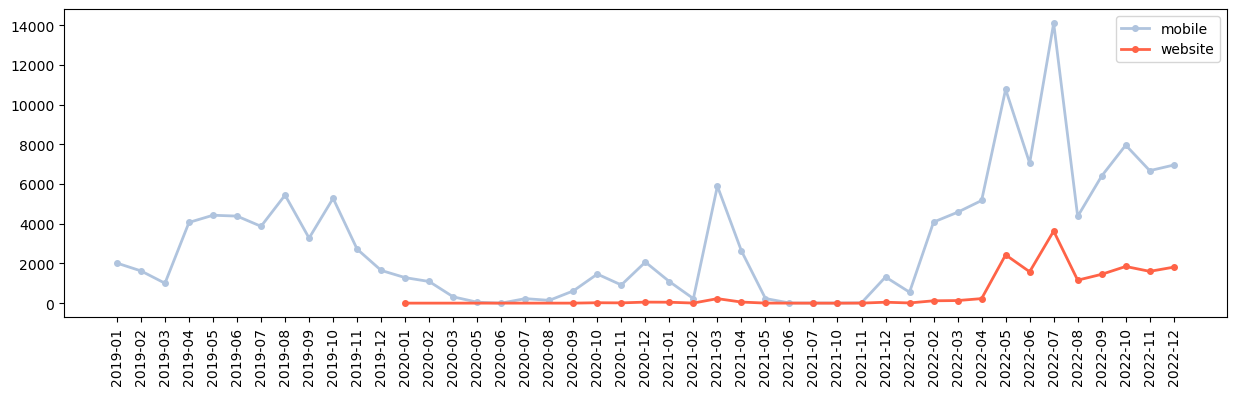

In [50]:
# Vẽ biểu đồ đường line chart

plt.figure(figsize=(15,4))
df_mobile=df_platform_time[df_platform_time['platform']=='mobile']
plt.plot(df_mobile['year_month'], df_mobile['total_ticket'], label= 'mobile', marker='o', color='lightsteelblue', linewidth=2, markersize=4)

df_web=df_platform_time[df_platform_time['platform']=='website']
plt.plot(df_web['year_month'], df_web['total_ticket'], label= 'website', marker='o', color='tomato', linewidth=2, markersize=4)
plt.xticks(rotation=90)
plt.legend()
plt.show()


OS version

In [51]:
# Phân loại: androi_others, ios, browser, unknown
df_join_all['os_version']=df_join_all['model'].apply(lambda x: 'ios' if ('iPhone' in x or 'iPod' in x)
                                                    else 'browser' if 'browser' in x 
                                                    else 'unknown' if ('devicemodel' in x or 'unknown' in x)
                                                    else 'android & other')

In [52]:
df_os=(
    df_join_all
    .groupby('os_version')
    .agg(total_ticket=('ticket_id','count'))
    .sort_values(by='total_ticket', ascending=True)
    .reset_index()
)
df_os

,os_version,total_ticket
0,browser,13377
1,android & other,21092
2,ios,51402
3,unknown,68854


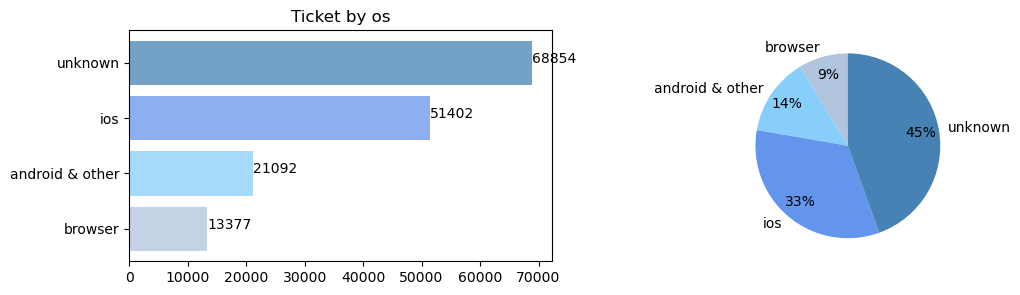

In [53]:
plt.figure(figsize=(12,3))
ax1=plt.subplot(1,2,1)
plt.barh(
    df_os['os_version'],
    df_os['total_ticket'],
    color=df_os['os_version'].replace({'browser':'lightsteelblue', 'android & other':'lightskyblue','ios':'cornflowerblue','unknown':'steelblue'}),
    alpha=0.75
)
for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('Ticket by os')

ax2=plt.subplot(1,2,2)
plt.pie(df_os['total_ticket'], labels=df_os['os_version'], colors=['lightsteelblue','lightskyblue','cornflowerblue','steelblue'], autopct='%1.0f%%',startangle=90, pctdistance=0.8 )

plt.show()

In [54]:
# Theo thời gian
df_os_time=(
    df_join_all
    .groupby(['year_month','os_version'])
    .agg(total_ticket=('ticket_id','count'))
    .sort_values(by='year_month', ascending=True)
    .reset_index()
)
df_os_time

,year_month,os_version,total_ticket
0,2019-01,android & other,713
1,2019-01,ios,1233
2,2019-01,unknown,73
3,2019-02,android & other,542
4,2019-02,ios,1074
...,...,...,...
136,2022-11,browser,1078
137,2022-12,browser,1202
138,2022-12,ios,2124
139,2022-12,android & other,88


In [55]:
# Chuyển thành dạng pivot để vẽ biểu đồ miền
df_os_time=(
    df_join_all
    .pivot_table(index='year_month', columns='os_version', aggfunc='count', values='ticket_id')
    .reset_index()
)


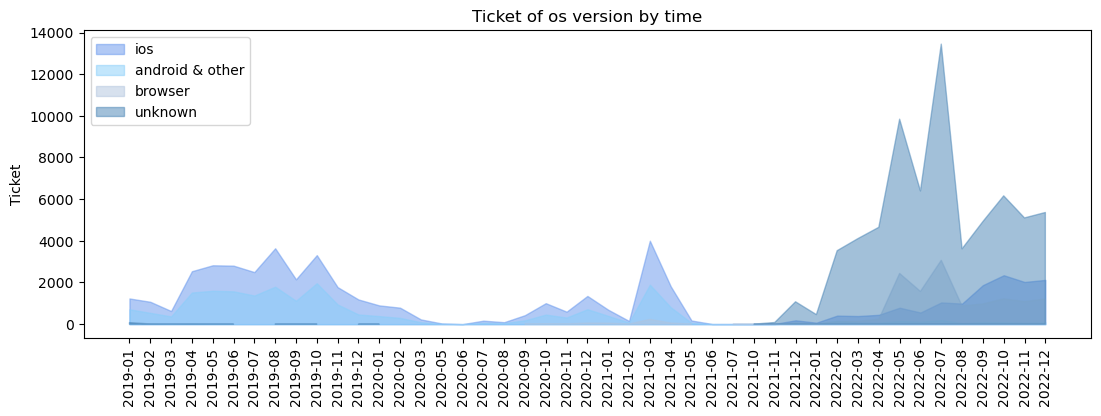

In [56]:
plt.figure(figsize=(13,4))
plt.fill_between(df_os_time['year_month'], df_os_time['ios'], color='cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & other'], color='lightskyblue', alpha=0.5, label='android & other')
plt.fill_between(df_os_time['year_month'], df_os_time['browser'], color='lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time['unknown'], color='steelblue', alpha=0.5, label='unknown')

plt.title('Ticket of os version by time')
plt.ylabel('Ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

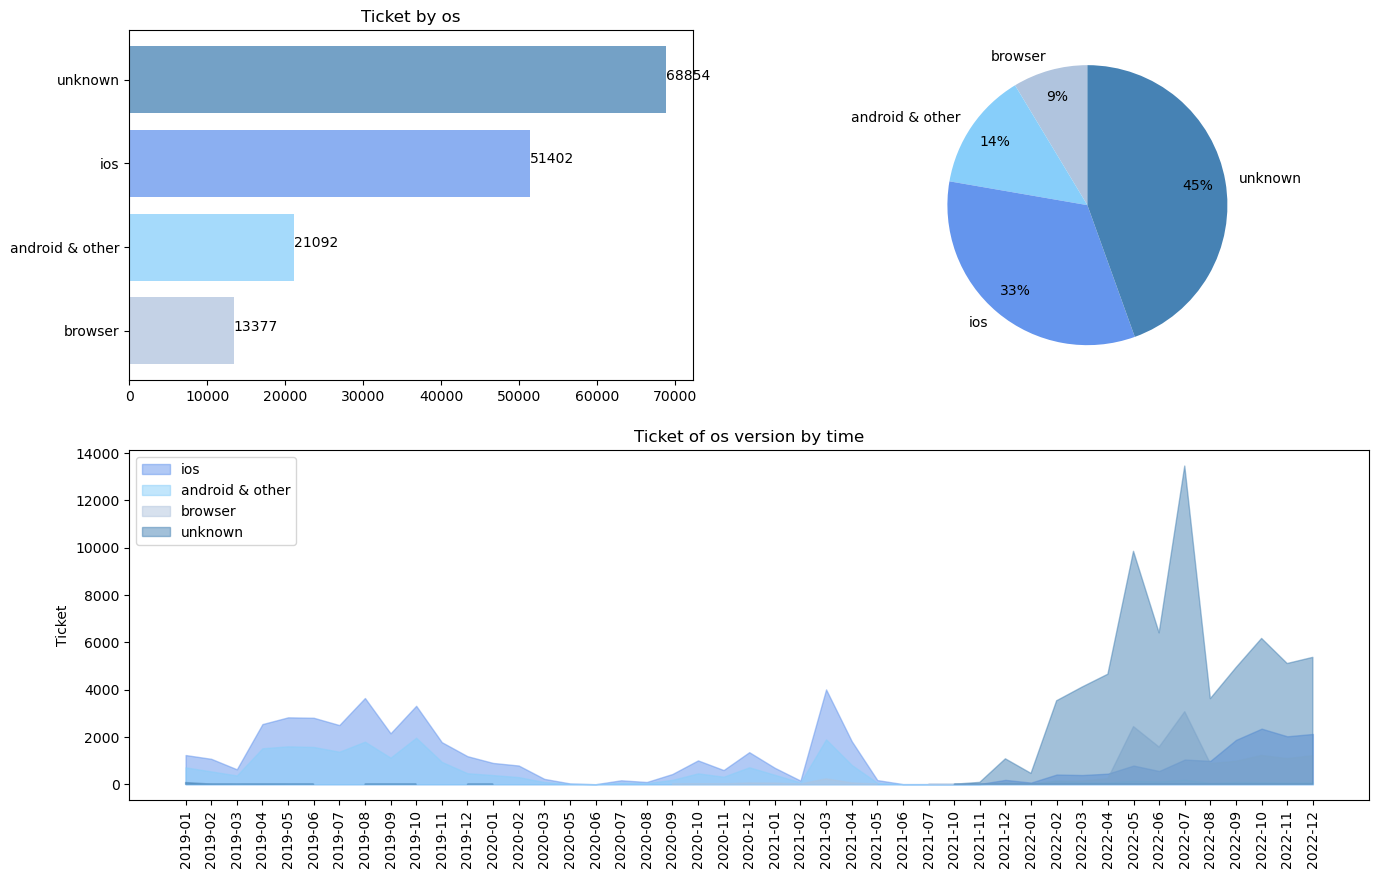

In [57]:
# Biểu diễn chung
plt.figure(figsize=(16,10))
ax1=plt.subplot(2,2,1)
plt.barh(
    df_os['os_version'],
    df_os['total_ticket'],
    color=df_os['os_version'].replace({'browser':'lightsteelblue', 'android & other':'lightskyblue','ios':'cornflowerblue','unknown':'steelblue'}),
    alpha=0.75
)
for index, value in enumerate(df_os['total_ticket']):
    plt.text(value, index, str(value))
plt.title('Ticket by os')

ax2=plt.subplot(2,2,2)
plt.pie(df_os['total_ticket'], labels=df_os['os_version'], colors=['lightsteelblue','lightskyblue','cornflowerblue','steelblue'], autopct='%1.0f%%',startangle=90, pctdistance=0.8 )

ax3=plt.subplot(2,1,2)
plt.fill_between(df_os_time['year_month'], df_os_time['ios'], color='cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & other'], color='lightskyblue', alpha=0.5, label='android & other')
plt.fill_between(df_os_time['year_month'], df_os_time['browser'], color='lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time['unknown'], color='steelblue', alpha=0.5, label='unknown')

plt.title('Ticket of os version by time')
plt.ylabel('Ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()


Payment method

In [58]:
df_method=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['paying_method']!='other')]
    .groupby('paying_method')
    .agg(total_ticket=('ticket_id','count'))
    .sort_values(by='total_ticket', ascending=True).reset_index()
)
df_method

,paying_method,total_ticket
0,debit card,11395
1,credit card,15408
2,bank account,42057
3,money in app,64817


In [59]:
df_method_time=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['paying_method']!='other')]
    .pivot_table(index='year_month', columns='paying_method', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_method_time.head()

paying_method,year_month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0


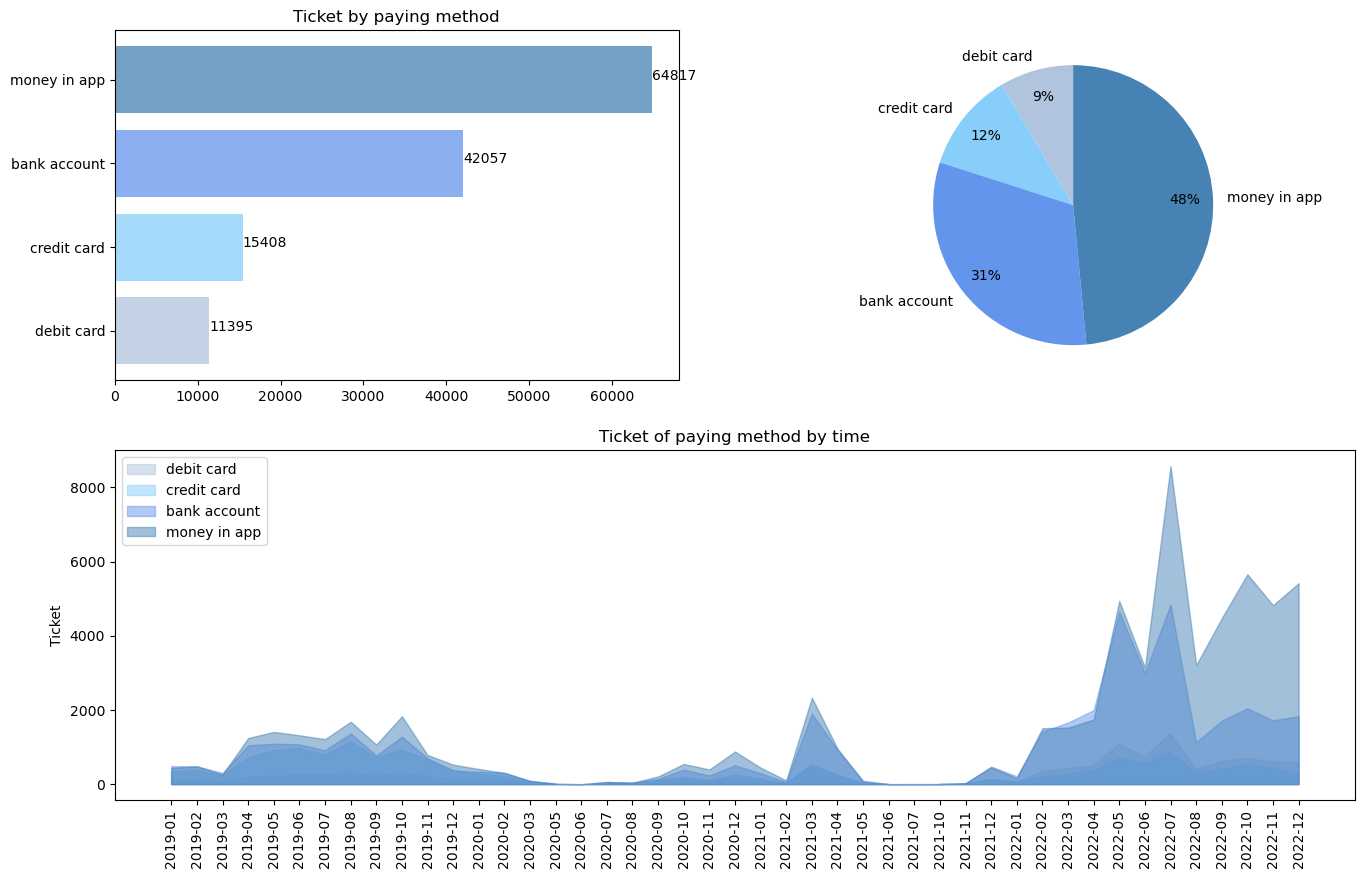

In [60]:
# Biểu diễn chung
plt.figure(figsize=(16,10))
ax1=plt.subplot(2,2,1)
plt.barh(
    df_method['paying_method'],
    df_method['total_ticket'],
    color=df_method['paying_method'].replace({'debit card':'lightsteelblue', 'credit card':'lightskyblue','bank account':'cornflowerblue','money in app':'steelblue'}),
    alpha=0.75
)
for index, value in enumerate(df_method['total_ticket']):
    plt.text(value, index, str(value))
plt.title('Ticket by paying method')

ax2=plt.subplot(2,2,2)
plt.pie(df_method['total_ticket'], labels=df_method['paying_method'], colors=['lightsteelblue','lightskyblue','cornflowerblue','steelblue'], autopct='%1.0f%%',startangle=90, pctdistance=0.8 )

ax3=plt.subplot(2,1,2)
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit card')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

plt.title('Ticket of paying method by time')
plt.ylabel('Ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [61]:
# Biểu đồ miền tỷ trọng các phương thức thanh toán
df_method_time=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['paying_method']!='other')]
    .pivot_table(index='year_month', columns='paying_method', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_method_time_pct=df_method_time.copy()
df_method_time_pct=df_method_time_pct.fillna(0)
df_method_time_pct['total']=df_method_time_pct.iloc[:,1:].sum(axis=1)
for i in df_method_time_pct.columns[1:5]:
    df_method_time_pct[i+'_pct']=df_method_time_pct[i]/df_method_time_pct['total']
df_method_time_pct.head()

paying_method,year_month,bank account,credit card,debit card,money in app,total,bank account_pct,credit card_pct,debit card_pct,money in app_pct
0,2019-01,487.0,336.0,93.0,443.0,1359.0,0.358352,0.247241,0.068433,0.325975
1,2019-02,484.0,370.0,93.0,480.0,1427.0,0.339173,0.259285,0.065172,0.336370
2,2019-03,304.0,225.0,74.0,263.0,866.0,0.351039,0.259815,0.085450,0.303695
3,2019-04,1050.0,705.0,189.0,1246.0,3190.0,0.329154,0.221003,0.059248,0.390596
4,2019-05,1092.0,903.0,212.0,1410.0,3617.0,0.301908,0.249654,0.058612,0.389826


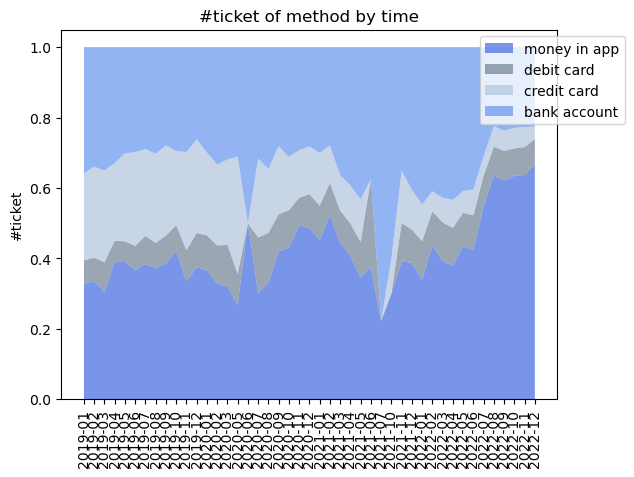

In [62]:
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

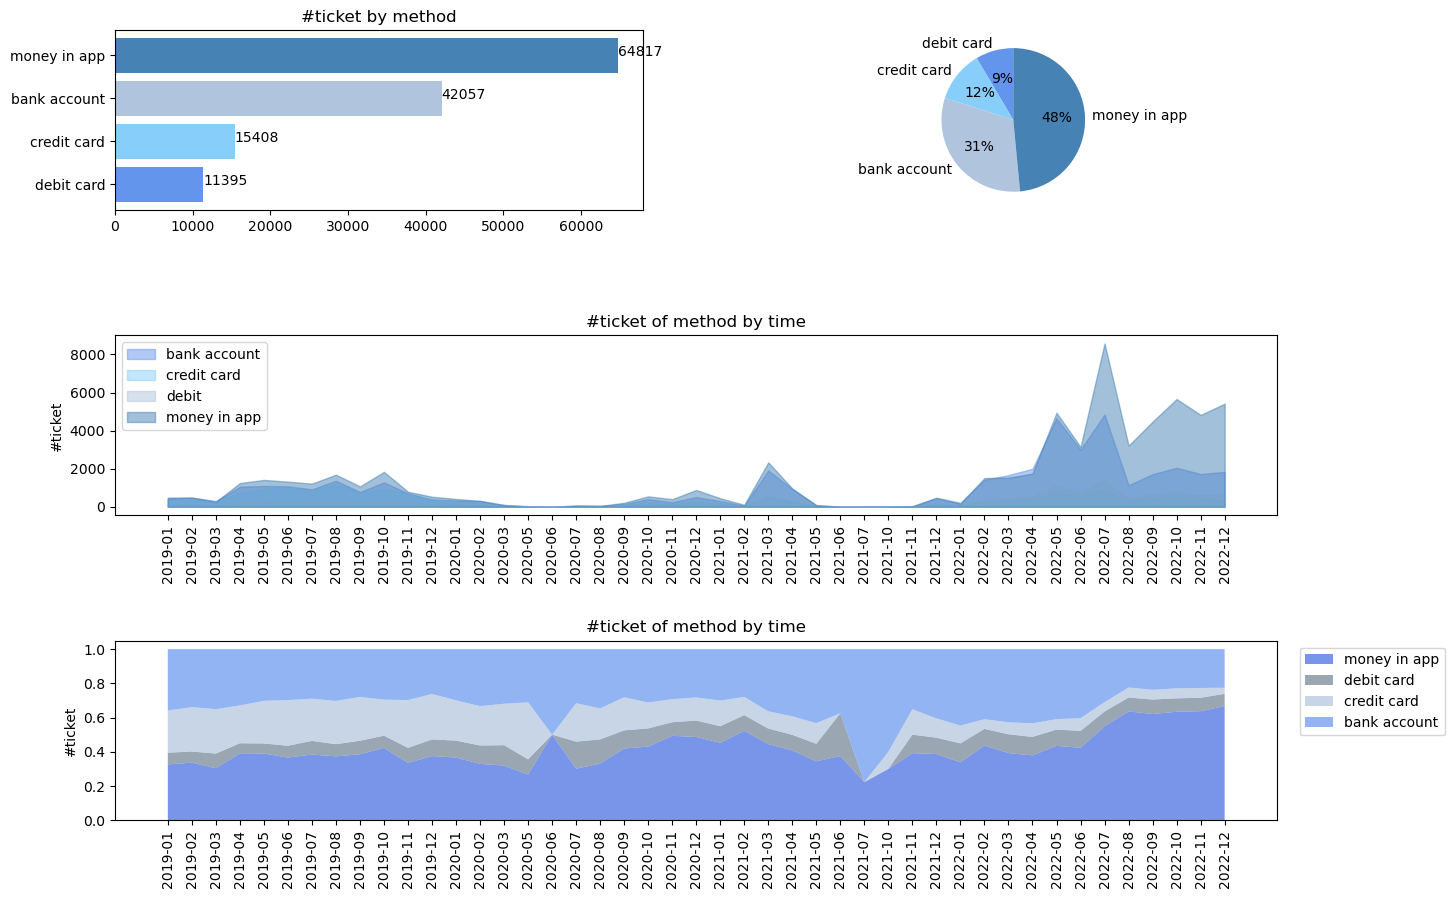

In [63]:
# biểu diễn chung 1 frame
plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_method['paying_method'], df_method['total_ticket'],
    color = df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(3,2,2)
plt.pie(df_method['total_ticket'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


ax4 = plt.subplot(3,1,3)
# vẽ biểu đồ miền 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

Promotion

In [64]:
df_join_all['type']=df_join_all['campaign_type'].apply(lambda x: 'non-promotion' if x=='unknown' else 'promotion')
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,weekday,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13402,36,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12568,34,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,13320,36,7,Saturday,11,2022-07,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,10293,28,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13560,37,7,Sunday,18,2022-07,unknown,promotion


In [65]:
df_type=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['paying_method']!='other')]
    .groupby('type')
    .agg(total_ticket=('ticket_id','count'))
    .sort_values(by='total_ticket', ascending=True).reset_index()
)
df_type_time=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['paying_method']!='other')]
    .pivot_table(index='year_month', columns='type', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_type_time_pct=df_type_time.copy()
df_type_time_pct=df_type_time_pct.fillna(0)
df_type_time_pct['total']=df_type_time_pct.iloc[:,1:].sum(axis=1)
for i in df_type_time_pct.columns[1:3]:
    df_type_time_pct[i+'_pct']=df_type_time_pct[i]/df_type_time_pct['total']
df_type_time_pct.head()

type,year_month,non-promotion,promotion,total,non-promotion_pct,promotion_pct
0,2019-01,517.0,842.0,1359.0,0.380427,0.619573
1,2019-02,1335.0,92.0,1427.0,0.935529,0.064471
2,2019-03,835.0,31.0,866.0,0.964203,0.035797
3,2019-04,1699.0,1491.0,3190.0,0.532602,0.467398
4,2019-05,1564.0,2053.0,3617.0,0.432403,0.567597


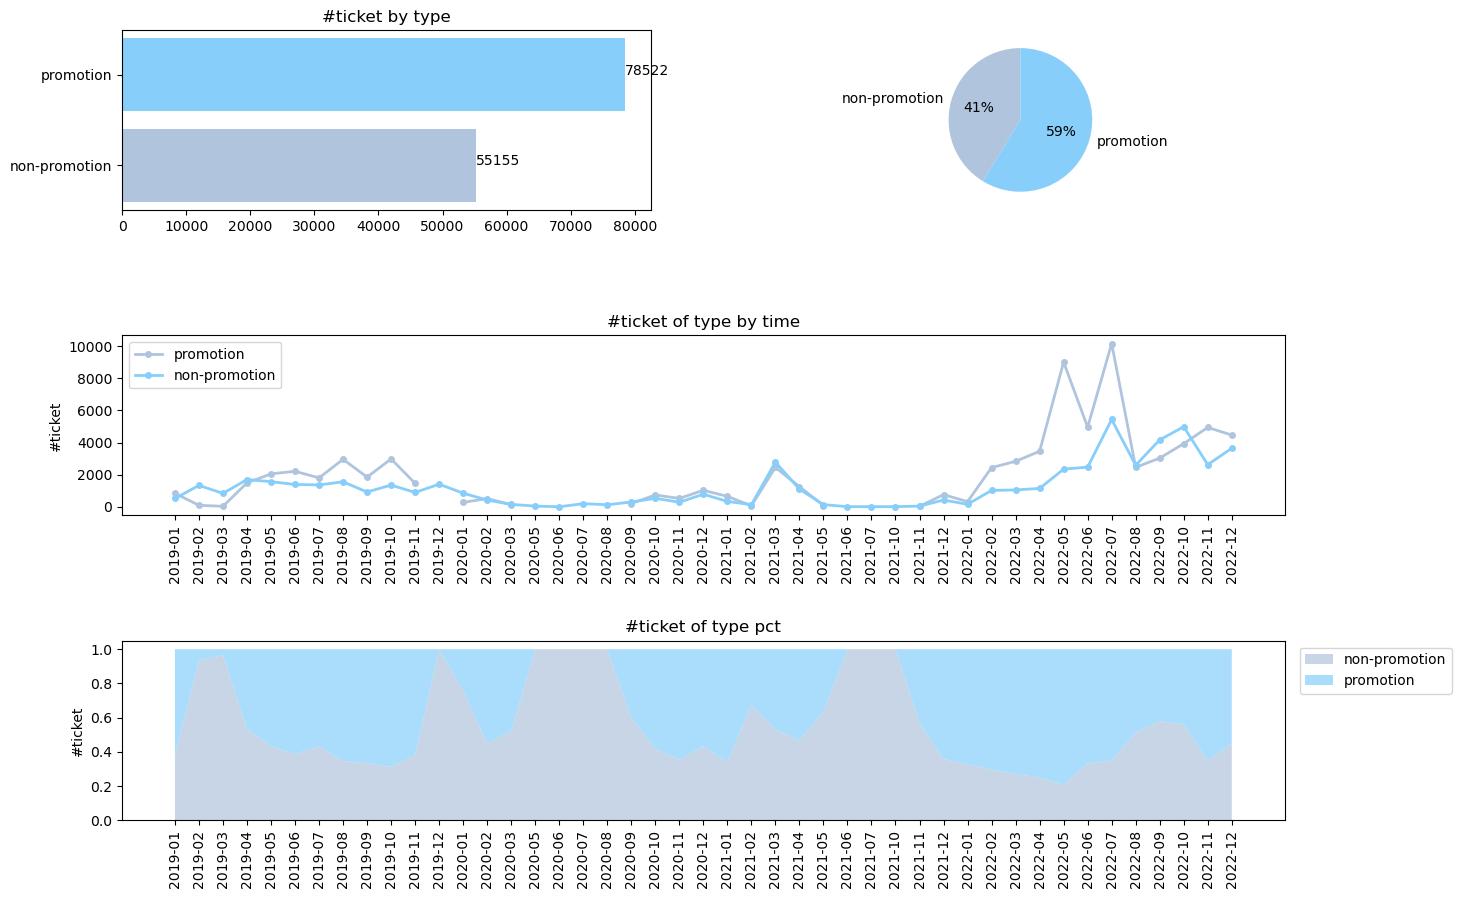

In [66]:
# biểu diễn chung 1 frame
plt.figure(figsize=(15, 10))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_type['type'], df_type['total_ticket'],
    color = df_type['type'].replace({ 'non-promotion': 'lightsteelblue',  'promotion': 'lightskyblue'})
)

for index,value in enumerate(df_type['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by type')

ax2 = plt.subplot(3,2,2)
plt.pie(df_type['total_ticket'], labels= df_type['type'],
        colors=df_type['type'].replace({ 'non-promotion': 'lightsteelblue',  'promotion': 'lightskyblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)

plt.plot(df_type_time['year_month'], df_type_time['promotion'], label= 'promotion', marker='o', color='lightsteelblue', linewidth=2, markersize=4)
plt.plot(df_type_time['year_month'], df_type_time['non-promotion'], label= 'non-promotion', marker='o', color='lightskyblue', linewidth=2, markersize=4)


# df_non_promotion_line=df_type_time[df_type_time['type']=='non-promotion']
# plt.plot(df_non_promotion_line['year_month'], df_non_promotion_line['total_ticket'], label= 'non-promotion', marker='o', color='lightskyblue', linewidth=2, markersize=4)

#plt.fill_between(df_type_time['year_month'], df_type_time['non-promotion'], color='lightsteelblue', alpha=0.5, label='non-promotion')
#plt.fill_between(df_type_time['year_month'], df_type_time['promotion'], color='lightskyblue', alpha=0.5, label='promoton')


plt.title('#ticket of type by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


ax4 = plt.subplot(3,1,3)
# vẽ biểu đồ miền 100%
plt.stackplot(df_type_time_pct['year_month'], df_type_time_pct["non-promotion_pct"],  df_type_time_pct['promotion_pct']
              , labels=['non-promotion', 'promotion'], colors=[ 'lightsteelblue','lightskyblue'], alpha=0.7)

plt.title('#ticket of type pct')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

Which movies did customer watch?


In [67]:
df_film_sum=(
    df_join_all[df_join_all['status_id']==1]
    .groupby('movie_name')
    .agg(total_ticket=('ticket_id','count'),
         total_customer=('customer_id','nunique'),
         revenue=('final_price','sum'))
         .sort_values(by='total_ticket', ascending=False)
         .reset_index()
)
df_film_sum

,movie_name,total_ticket,total_customer,revenue
0,Doctor Strange In The Multiverse Of Madness,8615,8409,65579.98
1,Minions: The Rise Of Gru,7224,7014,56530.93
2,Avatar: The Way Of Water,5870,5612,59830.95
3,Thor: Love And Thunder,5589,5478,43372.90
4,Peninsula,5499,5365,41208.44
...,...,...,...,...
248,Hitman: Agent Jun,64,64,527.64
249,Collectors,63,63,428.82
250,Honest Thief,62,61,457.82
251,Shutter Island,62,62,503.82


In [68]:
list_film=df_film_sum[df_film_sum['total_ticket']>1000]['movie_name'].unique()
list_selected_film=list(list_film)

In [69]:
df_movie_time=(
    df_join_all[(df_join_all['status_id']==1)& df_join_all['movie_name'].isin(list_selected_film)]
    .pivot_table(index='year_month', columns='movie_name', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_movie_time.head()

movie_name,year_month,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,Doraemon: Nobita's Little Star Wars 2021,Emergency Declaration,Extremely Easy Job,Face Off: 48h,Fantastic Beasts: Secrets Of Dumbledore,Fast & Furious Presents: Hobbs & Shaw,Godzilla Vs. Kong,Joker,Jurassic World Dominion,Love Destiny,Maleficent,Minions: The Rise Of Gru,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
0,2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
3,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
4,2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


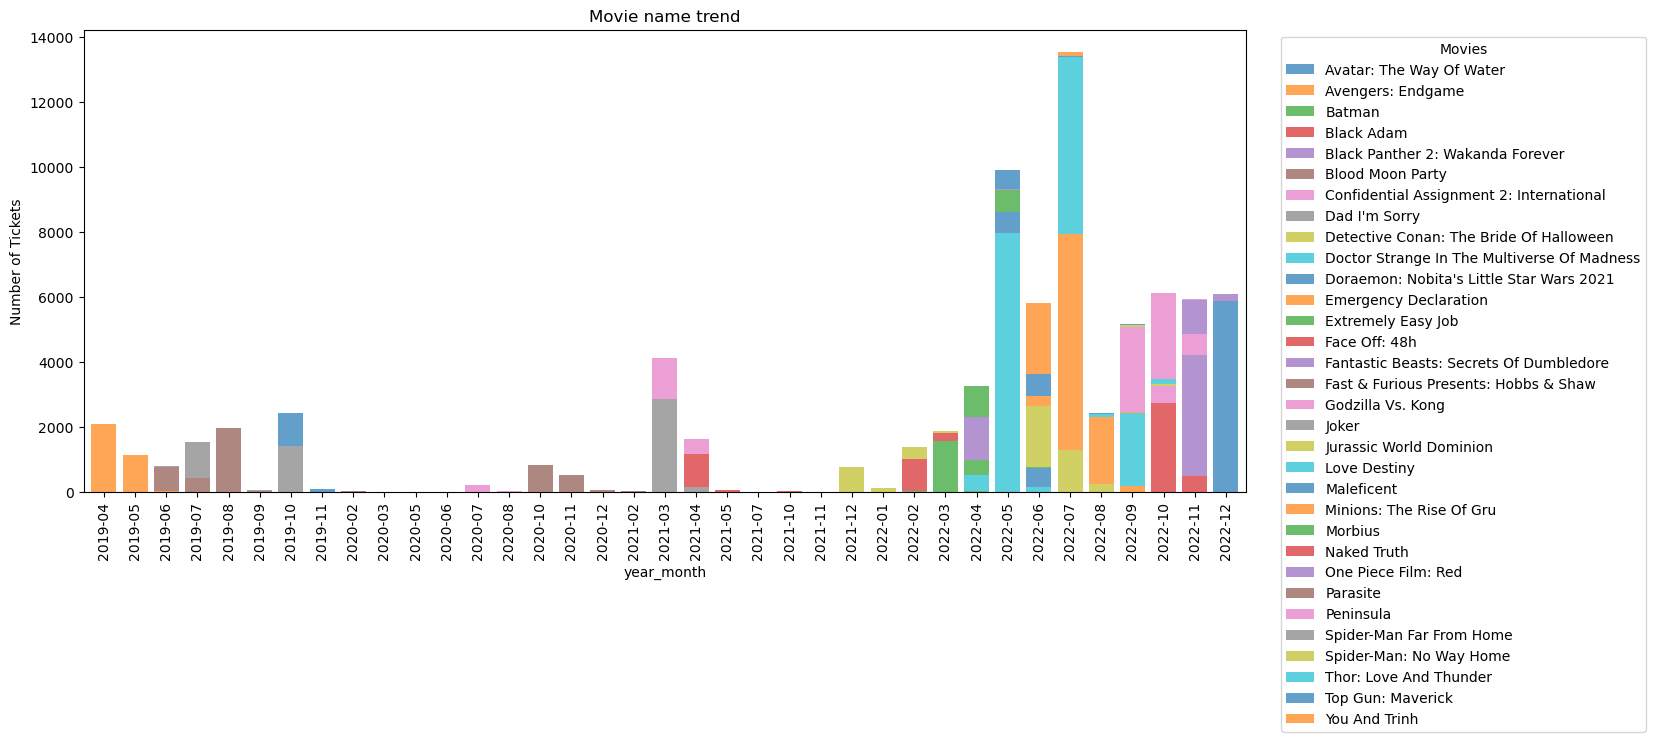

In [70]:
#Biểu đồ cột chồng
ax = df_movie_time.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
ax.set_title('Movie name trend')
# ax.set_xlabel('Month')
ax.set_ylabel('Number of Tickets')

# Add a legend
plt.legend(title='Movies', loc='upper right', bbox_to_anchor=(1.35, 1))

# Show the plot
plt.show()

### 3.4 Customer valur dimension

* Phân tích các chỉ số về
    * Frequency
    * Monetary
    * Success rate
    * Promotion_rate
    * Discount_rate

In [71]:
df_join_all

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,weekday,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13402,36,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12568,34,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,13320,36,7,Saturday,11,2022-07,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,10293,28,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13560,37,7,Sunday,18,2022-07,unknown,promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154720,6d81d62a2d26adb4c9b47d254a2bfe27,194726,debit card,70.0,f5ad6683cca252327b19bef18f0e8a65,5.16,2.31,2.85,2022-10-22 13:01:58.840,-5,97120,Black Adam,Male,2001-01-21,direct discount,Payment failed from bank,external,devicemodel,mobile,9054,24,10,Saturday,13,2022-10,unknown,promotion
154721,740855b0fdc18125b773f904279d2dfb,211166,money in app,101.0,217e197a017719ed96da9c140968a15f,5.07,0.00,5.07,2022-10-23 10:51:32.185,1,0,Black Adam,Male,1995-05-05,unknown,Order successful,unknown,devicemodel,mobile,11142,30,10,Sunday,10,2022-10,unknown,non-promotion
154722,9a65bf4e0ab9da0186007404f6ec0960,211671,money in app,176.0,627e3c4a56079dff9fd3a6f0f77ae13c,14.72,2.31,12.41,2022-10-23 11:11:23.037,1,97120,Black Adam,Male,1980-05-19,direct discount,Order successful,unknown,devicemodel,mobile,16606,45,10,Sunday,11,2022-10,unknown,promotion
154723,e47b196dbb5b487b3f6cf1cabe242552,223500,bank account,176.0,f6836889dc1bbc02547e23a1c59a8bb2,13.36,4.78,8.58,2022-10-22 20:35:02.732,1,97150,Black Adam,Not verify,1970-01-01,direct discount,Order successful,unknown,browser,website,20397,55,10,Saturday,20,2022-10,browser,promotion


In [72]:
# Tính toán các chỉ số
    # Tính các chỉ số cho những vé thanh toán thành công: tần suất, số tiền, promotion
def cal_n_promotion(x):
    return(x=='promotion').sum()

df_success_metric=(
    df_join_all[df_join_all['status_id']==1]
    .assign(date=pd.to_datetime(df_join_all['time']).dt.date)
    .groupby('customer_id')
    .agg(
        n_success=('ticket_id','count'),
        s_money=('original_price','sum'),
        s_discount=('discount_value','sum'),
        n_day=('date', 'nunique'),
        n_month=('year_month','nunique'),
        n_promotion=('type',cal_n_promotion)
    )
    .reset_index()
)

In [73]:
df_success_metric.head()

,customer_id,n_success,s_money,s_discount,n_day,n_month,n_promotion
0,100001,1,7.42,2.06,1,1,1
1,100003,6,60.95,2.56,6,6,1
2,100004,1,32.25,0.00,1,1,0
3,100005,1,9.49,2.06,1,1,1
4,100006,1,12.37,0.00,1,1,0


In [74]:
# Tính các chỉ số: tổng số giao dịch, số giao dịch lỗi
def calc_n_fail(x):
    return(x!=1).sum()
df_failed_metric=(
    df_join_all
   
    .groupby('customer_id')
    .agg(
        n_total=('ticket_id','count'),
        n_fail=('status_id',calc_n_fail)
    )
    .reset_index()
)
df_failed_metric.head()

,customer_id,n_total,n_fail
0,100001,1,0
1,100003,6,0
2,100004,1,0
3,100005,1,0
4,100006,1,0


In [75]:
# join
df_customer_value=pd.merge(df_success_metric,df_failed_metric, how='left', on='customer_id').fillna(0)

In [76]:
df_customer_value['success_rate']=df_customer_value['n_success']/df_customer_value['n_total']
df_customer_value['promotion_rate']=df_customer_value['n_promotion']/df_customer_value['n_success']
df_customer_value['discount_rate']=df_customer_value['s_discount']/df_customer_value['s_money']
df_customer_value.head()



,customer_id,n_success,s_money,s_discount,n_day,n_month,n_promotion,n_total,n_fail,success_rate,promotion_rate,discount_rate
0,100001,1,7.42,2.06,1,1,1,1,0,1.0,1.000000,0.277628
1,100003,6,60.95,2.56,6,6,1,6,0,1.0,0.166667,0.042002
2,100004,1,32.25,0.00,1,1,0,1,0,1.0,0.000000,0.000000
3,100005,1,9.49,2.06,1,1,1,1,0,1.0,1.000000,0.217071
4,100006,1,12.37,0.00,1,1,0,1,0,1.0,0.000000,0.000000


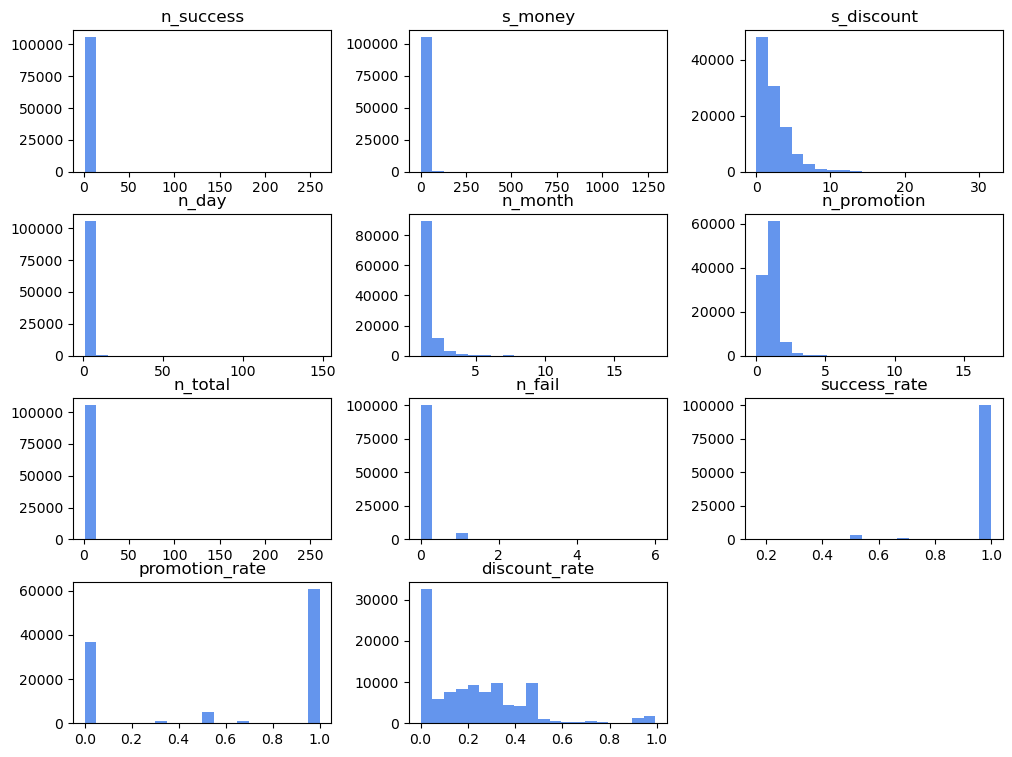

In [77]:
# Visualize bằng histogram
df_customer_value.iloc[:,1:].hist(figsize=(12,9), grid=False, color='cornflowerblue', bins=20)
plt.show()

>>- ntotal: Hầu hết là khách hành cá nhân, mua từ 1-2 vé; nhưng có nhứng người mua rất nhiều ~250
>>- promotion_rate: có hơn 60000 KH chỉ mua vé khi có promorion (100%)
>>- n_promotion: 60 k khách hàng chỉ sử dụng promotion 1 lần, có line quan gì đến nhóm ở promotion_date=100 không?
>>- success_rate: có một tỷ lệ giao dịch bị lỗi--> Lỗi??

# 

## Frequency anomaly behavior

In [78]:
# Gom nhóm số lượng mua vé
df_customer_value['n_order_dis']=df_customer_value['n_success'].apply(lambda x: 'more than 10' if x>=10 else str(x))

In [79]:
df_n_dis=df_customer_value.groupby('n_order_dis').agg(total=('n_order_dis', 'count')).reset_index()
df_n_dis

,n_order_dis,total
0,1,87921
1,2,12902
2,3,3145
3,4,1017
4,5,380
5,6,168
6,7,92
7,8,47
8,9,30
9,more than 10,74


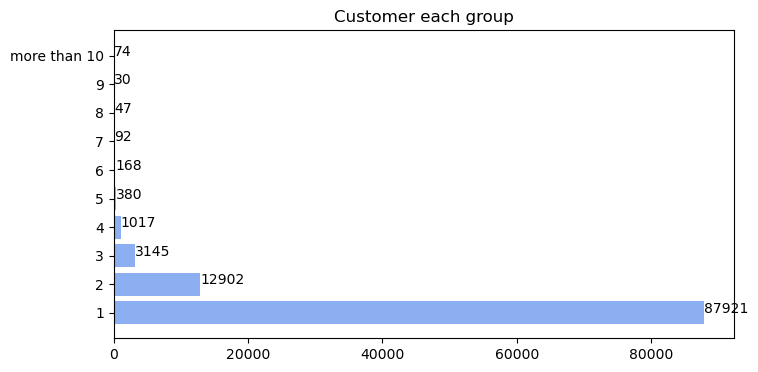

In [80]:
# Biểu đồ cột ngang
plt.figure(figsize=(8,4))
plt.barh(
    df_n_dis['n_order_dis'],
    df_n_dis['total'],
    color='cornflowerblue',
    #color=df_n_dis['platform'].replace({'mobile':'lightskyblue', 'website':'tomato'}),
    alpha=0.75,
)
for index, value in enumerate(df_n_dis['total']):
    plt.text(value, index, str(value))
plt.title('Customer each group')
plt.show()

In [81]:
# Khách hàng chỉ mua 1 lần
# Lấy ra top những khách hàng mua nhiều, nếu mua dồn dập 1 lúc--> bất thường
list_customer_massive=list(df_customer_value[df_customer_value['n_success']>30]['customer_id'].unique())


In [82]:
df_cus_masive_pivot=(
    df_join_all[(df_join_all['customer_id'].isin( list_customer_massive))&df_join_all['status_id']==1]
    .pivot_table(index='year_month', columns='customer_id', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_cus_masive_pivot

customer_id,year_month,102948,103035,103347,108110,108162,108729,111644,114205,117140,117362,117475,118349,122962,131905,153124,153588,158089,168132,179471,222641,226527,226886
0,2019-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04,NaN,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,2019-05,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
5,2019-06,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1.0,1.0,NaN,1.0,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
6,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
7,2019-08,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
8,2019-09,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
9,2019-10,NaN,4.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


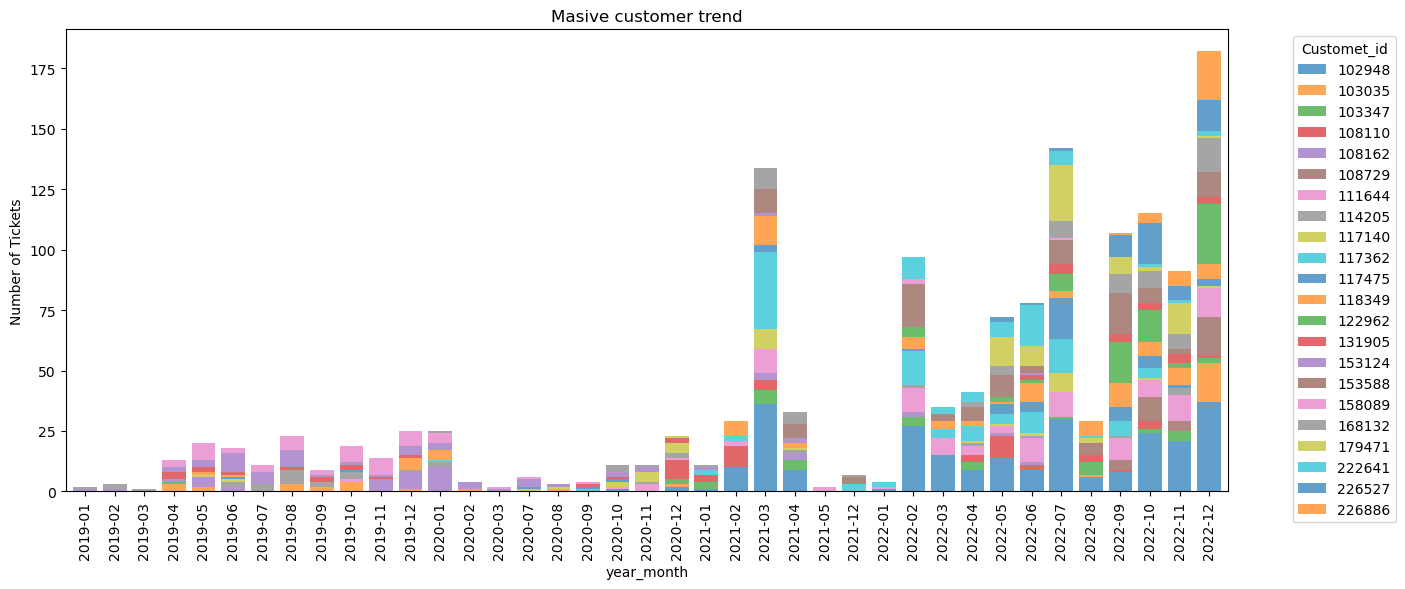

In [83]:
#Biểu đồ cột chồng
ax = df_cus_masive_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
ax.set_title('Masive customer trend')
# ax.set_xlabel('Month')
ax.set_ylabel('Number of Tickets')

# Add a legend
plt.legend(title='Customet_id', loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()

# Khách hàng mua nhiều nhưng mua rải rác --> không bất thường

Massive promotion

In [84]:
df_customer_value['n_promo_dis']=df_customer_value['n_promotion'].apply(lambda x: 'more than 10' if x>=10 else str(x))

In [85]:
df_promo_dis=df_customer_value.groupby('n_promo_dis').agg(total_cus=('customer_id','count')).reset_index()
df_promo_dis

,n_promo_dis,total_cus
0,0,36797
1,1,61334
2,2,6264
3,3,1042
4,4,230
5,5,74
6,6,19
7,7,10
8,8,2
9,9,2


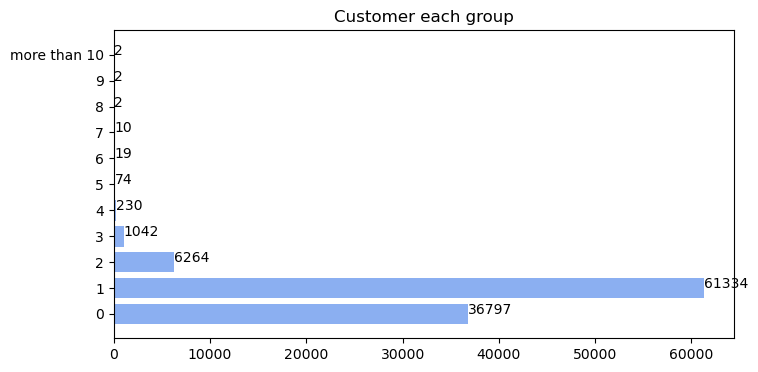

In [86]:
# Biểu đồ cột ngang
plt.figure(figsize=(8,4))
plt.barh(
    df_promo_dis['n_promo_dis'],
    df_promo_dis['total_cus'],
    color='cornflowerblue',
    #color=df_n_dis['platform'].replace({'mobile':'lightskyblue', 'website':'tomato'}),
    alpha=0.75,
)
for index, value in enumerate(df_promo_dis['total_cus']):
    plt.text(value, index, str(value))
plt.title('Customer each group')
plt.show()

In [87]:
# Phần lớn khách hàng mua vé khi có các chương trình khuyễn mãi
# 90% chỉ hướng KM một lần duy nhất
#   Do khách đến chỉ vì KM
#   Các chương tình promotion chỉ giới hạn 1 người sử dụng 1 lần, chỉ dành cho những KH mới

#--> Loại KM KH đang sử dụng là gì?


In [88]:
# Loại Km mà KH SD
df_type_group=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['type']=='promotion')]
    .groupby('campaign_type').agg(total=('ticket_id','count'))
    .reset_index()
)

In [89]:
df_type_group
# 90 % giảm giá trực tiếp

,campaign_type,total
0,direct discount,68449
1,reward point,3150
2,voucher,6924


In [90]:
## Tính tỷ lệ loại KM chi tiết cho từng nhóm Kh
df_n_success=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['type']=='promotion')]
    .groupby('customer_id')
    .agg(n_promotion=('ticket_id','count'))
)


In [91]:
df_n_pivot=(
     df_join_all[(df_join_all['status_id']==1)&(df_join_all['type']=='promotion')]
    .pivot_table(index='customer_id', columns='campaign_type', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_n_pivot.head()

campaign_type,customer_id,direct discount,reward point,voucher
0,100001,NaN,NaN,1.0
1,100003,1.0,NaN,NaN
2,100005,NaN,NaN,1.0
3,100007,1.0,NaN,NaN
4,100009,7.0,NaN,NaN


In [92]:
df_n_join=(
    pd.merge(df_n_success, df_n_pivot, how='inner', on='customer_id')
    .groupby('n_promotion').agg(
        n_cus=('customer_id','count'),
        n_voucher=('voucher','sum'),
        n_d_discount=('direct discount','sum'),
        n_rewward_point=('reward point','sum'),
    )
    .reset_index()
)
df_n_join['total']=df_n_join.iloc[:,2:].sum(axis=1)
for i in df_n_join.columns[2:5]:
    df_n_join[i+'_pct']=df_n_join[i]/df_n_join['total']
df_n_join

,n_promotion,n_cus,n_voucher,n_d_discount,n_rewward_point,total,n_voucher_pct,n_d_discount_pct,n_rewward_point_pct
0,1,61334,5358.0,53098.0,2878.0,61334.0,0.087358,0.865719,0.046923
1,2,6264,1091.0,11222.0,215.0,12528.0,0.087085,0.895754,0.017162
2,3,1042,293.0,2788.0,45.0,3126.0,0.093730,0.891875,0.014395
3,4,230,87.0,827.0,6.0,920.0,0.094565,0.898913,0.006522
4,5,74,43.0,323.0,4.0,370.0,0.116216,0.872973,0.010811
5,6,19,12.0,102.0,0.0,114.0,0.105263,0.894737,0.000000
6,7,10,14.0,54.0,2.0,70.0,0.200000,0.771429,0.028571
7,8,2,2.0,14.0,0.0,16.0,0.125000,0.875000,0.000000
8,9,2,6.0,12.0,0.0,18.0,0.333333,0.666667,0.000000
9,10,1,1.0,9.0,0.0,10.0,0.100000,0.900000,0.000000


In [93]:
format_dict={'total':'{:.0f}', 'n_voucher_pct':'{:.2%}','n_d_discount_pct':'{:.2%}','n_rewward_point_pct':'{:.2%}'}

In [94]:
# Heat map cho table
(
df_n_join
.drop(columns=['n_voucher','n_d_discount','n_rewward_point'])
.style
.format(format_dict)
.background_gradient(subset=['n_voucher_pct','n_d_discount_pct','n_rewward_point_pct'], cmap='PuBu')
.background_gradient(subset=['total'], cmap='YlGn')
)


,n_promotion,n_cus,total,n_voucher_pct,n_d_discount_pct,n_rewward_point_pct
0,1,61334,61334,8.74%,86.57%,4.69%
1,2,6264,12528,8.71%,89.58%,1.72%
2,3,1042,3126,9.37%,89.19%,1.44%
3,4,230,920,9.46%,89.89%,0.65%
4,5,74,370,11.62%,87.30%,1.08%
5,6,19,114,10.53%,89.47%,0.00%
6,7,10,70,20.00%,77.14%,2.86%
7,8,2,16,12.50%,87.50%,0.00%
8,9,2,18,33.33%,66.67%,0.00%
9,10,1,10,10.00%,90.00%,0.00%


In [95]:
# 90 % KH chọn tham gia campaign direct discount

### 3.5 Customer retention

**# Dựa vào thời điểm chuyển đổi khách hàng: lần đầu thanh toán, mua hàng, cài đặt,...**


In [104]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

In [109]:
# Bước 1: Tính toán các thông tin : cohort (first_month), current_month, subsequent month
df_selected_time=df_join_all[(df_join_all['time']<'2020-01-01') &(df_join_all['status_id'] ==1)]
# Tìm thời điểm đầu tiên phát sinh đơn hàng (tháng đầu tiên) của khách hàng dó
df_selected_time['first_month']=df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month']=df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month']=(df_selected_time['current_month']-df_selected_time['first_month']).apply(attrgetter('n'))


C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\3099379344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month']=df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\3099379344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month']=df_selected_time['time'].dt.to_period('M')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\3099379344.py:6: SettingWithCopyWarning: 
A 

In [110]:
df_selected_time.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,weekday,hour,year_month,os_version,type,first_month,current_month,subsequent_month
11327,9e3e753f70aede1c6dcc577ce563eef1,100009,credit card,74.0,3cac5d2e2eb76525aecea5c2ab46b3d9,9.07,2.56,6.51,2019-11-09 16:19:41.008,1,25680,Doctor Sleep,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone10,2",mobile,13402,36,11,Saturday,16,2019-11,ios,promotion,2019-04,2019-11,7
11328,74a0ac9b7c60d2e7d3664686c3342c00,101892,money in app,79.0,fe9a5c91e224f005a8be1c62923548d8,9.07,2.56,6.51,2019-11-16 16:35:02.953,1,25690,Doctor Sleep,Female,1986-10-19,direct discount,Order successful,unknown,Samsung SM-N935F,mobile,14262,39,11,Saturday,16,2019-11,android & other,promotion,2019-08,2019-11,3
11329,4a653fb01188cfaefe7e3731de2648de,105574,credit card,43.0,99b47df3cdeecb3dec4da6c18b916dd0,9.07,2.56,6.51,2019-11-09 18:10:13.461,1,25680,Doctor Sleep,Male,1935-01-01,direct discount,Order successful,unknown,"iPhone9,2",mobile,33181,90,11,Saturday,18,2019-11,ios,promotion,2019-11,2019-11,0
11332,f075d68aa14bc424e3d9ca7904f900a5,111681,credit card,123.0,a43fb711603d5f2be7001397d280e413,8.66,2.10,6.56,2019-11-16 22:02:42.851,1,25690,Doctor Sleep,Not verify,1970-01-01,direct discount,Order successful,unknown,HTC HTC_U-3u,mobile,20397,55,11,Saturday,22,2019-11,android & other,promotion,2019-11,2019-11,0
11333,747efd023e43617ca96e127c8af625b8,116896,money in app,72.0,ac219f148fe5a9653b48ce64b41625b7,6.19,0.00,6.19,2019-11-13 17:32:32.892,1,0,Doctor Sleep,Male,1990-08-30,unknown,Order successful,unknown,OnePlus HD1900,mobile,12851,35,11,Wednesday,17,2019-11,android & other,non-promotion,2019-11,2019-11,0


In [112]:
# B2: Group by
df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)
df_cohor

,first_month,current_month,subsequent_month,n_customers
0,2019-01,2019-01,0,1348
1,2019-01,2019-02,1,50
2,2019-01,2019-03,2,35
3,2019-01,2019-04,3,26
4,2019-01,2019-05,4,25
...,...,...,...,...
73,2019-10,2019-11,1,137
74,2019-10,2019-12,2,71
75,2019-11,2019-11,0,1522
76,2019-11,2019-12,1,48


In [113]:
df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

# chuyển sang %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

In [115]:
retention_matrix

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1.0,0.037092,0.025964,0.019288,0.018546,0.024481,0.026706,0.021513,0.013353,0.025964,0.015579,0.014837
2019-02,1.0,0.044857,0.068059,0.049497,0.060325,0.038670,0.044857,0.023202,0.035576,0.022428,0.027069,NaN
2019-03,1.0,0.068456,0.064430,0.065772,0.044295,0.044295,0.040268,0.045638,0.030872,0.018792,NaN,NaN
2019-04,1.0,0.034565,0.035250,0.029774,0.031485,0.022587,0.032854,0.021561,0.014374,NaN,NaN,NaN
2019-05,1.0,0.044947,0.036578,0.039988,0.027898,0.028828,0.027898,0.019219,NaN,NaN,NaN,NaN
2019-06,1.0,0.042782,0.049314,0.032005,0.043436,0.037231,0.020575,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.046342,0.030257,0.037917,0.029874,0.015320,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.029987,0.041499,0.028380,0.017135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.053942,0.030890,0.017981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


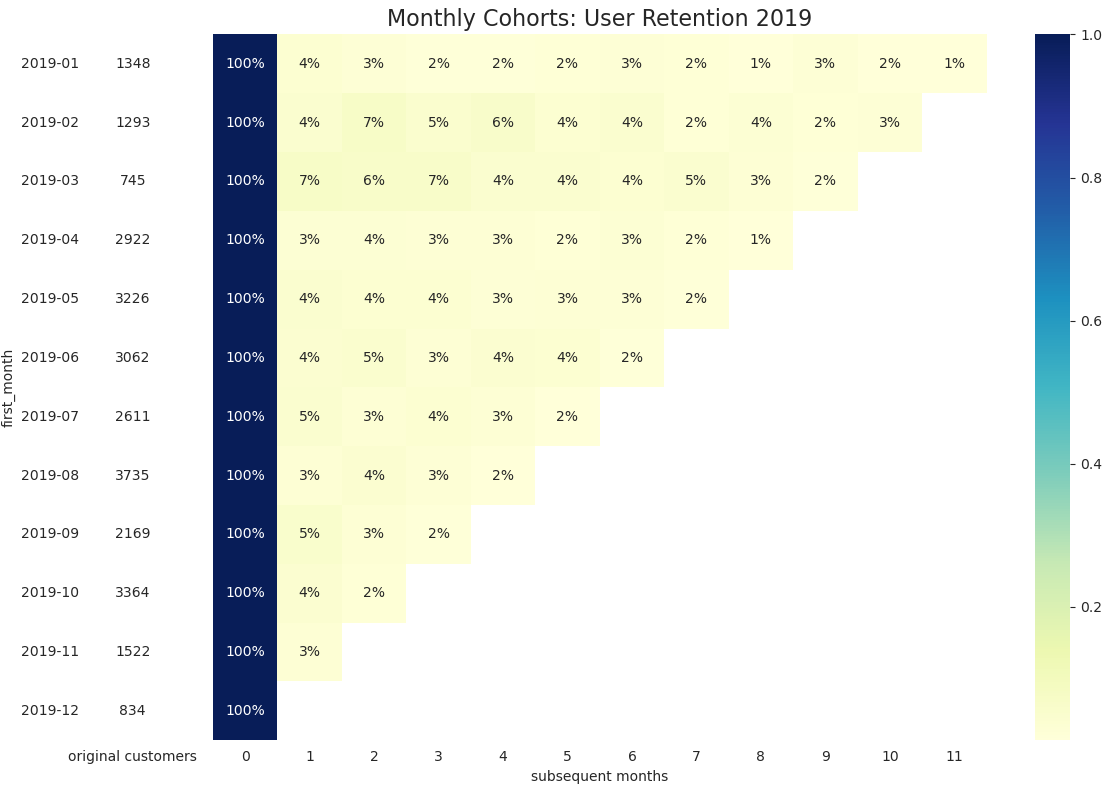

In [118]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])
    ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

    fig.tight_layout()

In [119]:
# Bước 1: Tính toán các thông tin : cohort (first_month), current_month, subsequent month
df_selected_time=df_join_all[(df_join_all['time']>='2022-01-01') &(df_join_all['status_id'] ==1)]
# Tìm thời điểm đầu tiên phát sinh đơn hàng (tháng đầu tiên) của khách hàng dó
df_selected_time['first_month']=df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month']=df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month']=(df_selected_time['current_month']-df_selected_time['first_month']).apply(attrgetter('n'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\3489391007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month']=df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\3489391007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month']=df_selected_time['time'].dt.to_period('M')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\3489391007.py:6: SettingWithCopyWarning: 
A 

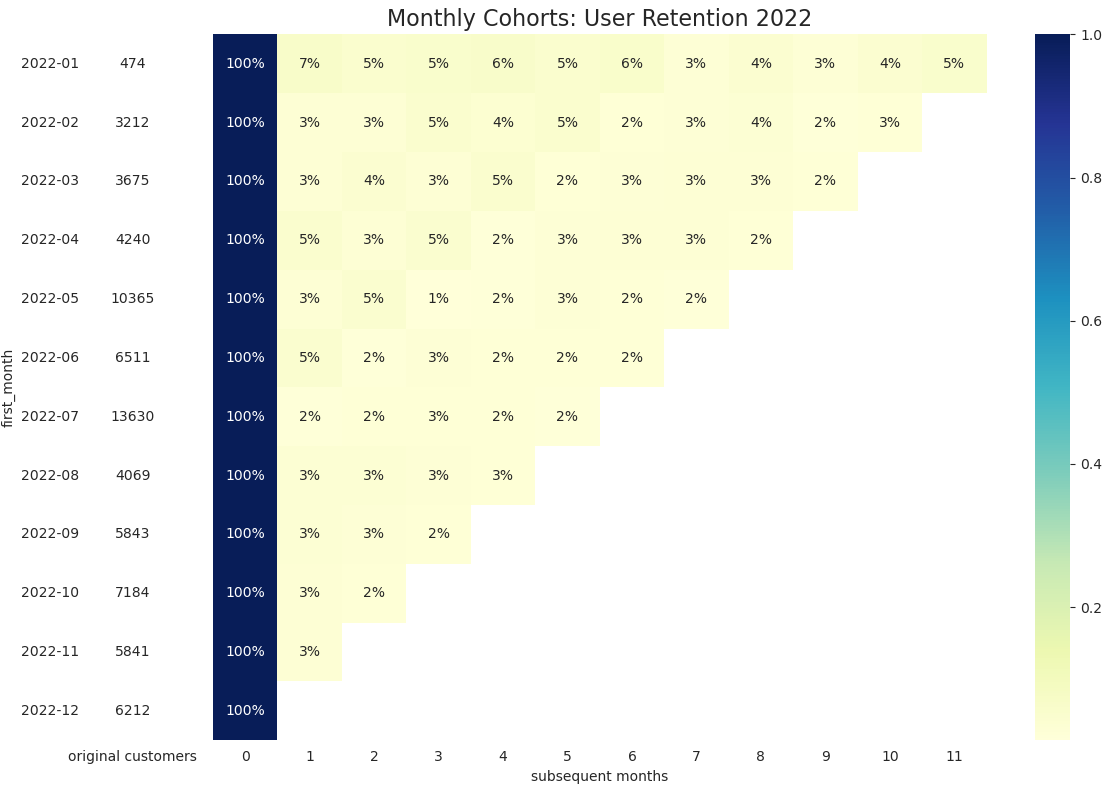

In [120]:
df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

# chuyển sang %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])
    ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

    fig.tight_layout()


In [ ]:
# Retention 2019 và 2022 không có nhiều thay đổi có thể do khó khăn chung của thị trường, hoặc công ty đang tập trung hơn vào tìm kiếm khách hàng mới thay vì giữu chân KH
# Tại sao retention thấp dù >60% Kh tham gia ppromotion

Compare: Retention of promotion customers & organic customers


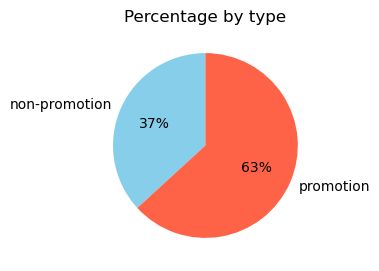

In [124]:
df_pie_promo=(
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['time'] > '2022-01-01')]
    .groupby('type')
    .agg(total_cus=('customer_id','nunique'))
    .sort_values(by='total_cus', ascending=True).reset_index()
)

plt.figure(figsize=(6,3))
plt.pie(df_pie_promo['total_cus'],
        labels=df_pie_promo['type'],
        autopct='%1.0f%%',
        colors=df_pie_promo['type'].replace({'promotion':'tomato','non-promotion':'skyblue'}),
        startangle= 90
        )
plt.title('Percentage by type')
plt.show()


In [132]:
df_pie_promo

,type,total_cus
0,non-promotion,27672
1,promotion,47507


In [ ]:
# Phân biệt nhóm đến từ promotion và nhóm bình thường: dựa vào giao dịch thành công đầu tiên
df_data_check= (
    df_join_all[(df_join_all['status_id']==1)&(df_join_all['time']>='2022-01-01')][['customer_id','ticket_id','time','type']]
)
df_data_check

,customer_id,ticket_id,time,type
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion
1,100493,07abbaf28c772692f0367ad992bb3184,2022-07-15 20:44:09.952,promotion
2,100596,1fdbeb7eceba8a27d9d985b5b70c219a,2022-07-30 11:16:55.483,non-promotion
3,100852,7715c9955866bd296b98543412839abd,2022-07-04 22:33:07.458,promotion
4,100965,776efd7bda0b715084430e6385f67746,2022-07-03 18:41:45.098,promotion
...,...,...,...,...
154719,228027,8b492b9e118ac5970eab16a1ddd0867b,2022-11-13 21:08:02.245,promotion
154721,211166,740855b0fdc18125b773f904279d2dfb,2022-10-23 10:51:32.185,non-promotion
154722,211671,9a65bf4e0ab9da0186007404f6ec0960,2022-10-23 11:11:23.037,promotion
154723,223500,e47b196dbb5b487b3f6cf1cabe242552,2022-10-22 20:35:02.732,promotion


In [129]:
    # Đánh STT các ticket của khách hàng

df_data_check['row_number']=df_data_check.groupby('customer_id').cumcount()+1
df_data_check.head(20)

,customer_id,ticket_id,time,type,row_number
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion,1
1,100493,07abbaf28c772692f0367ad992bb3184,2022-07-15 20:44:09.952,promotion,1
2,100596,1fdbeb7eceba8a27d9d985b5b70c219a,2022-07-30 11:16:55.483,non-promotion,1
3,100852,7715c9955866bd296b98543412839abd,2022-07-04 22:33:07.458,promotion,1
4,100965,776efd7bda0b715084430e6385f67746,2022-07-03 18:41:45.098,promotion,1
5,101001,284d3fe54b25bb1877106b3335b82333,2022-07-08 13:44:11.611,promotion,1
7,101502,63e2018e8d2a277b31c37094d3325ccd,2022-07-17 17:41:47.684,promotion,1
8,101788,e3a7ee66aa7633c807af92fd60938d2a,2022-07-06 20:54:39.705,promotion,1
9,101905,bac5700d10216de03474a15d415c63f7,2022-07-09 10:59:58.494,promotion,1
10,102751,3f09045d8bf7b8260ead55ab22bfd4ac,2022-07-22 20:44:05.361,promotion,1


In [131]:
# Lấy ra nhứng KH đến từ chương trình promotion
df_data_check[(df_data_check['type']=='promotion')&(df_data_check['row_number']==1)]['customer_id'].nunique()

45523

In [ ]:
45523/47507
# Trong số KH tham gia promotion, có 96% Kh là Kh mới, tham gia lần đầu

0.9582377333866589

In [135]:
# Trong số trên, retention là bao niêu
df_first_promo_list=df_data_check[(df_data_check['type']=='promotion')&(df_data_check['row_number']==1)]['customer_id']
df_first_promo_list.drop_duplicates(inplace=True)
df_first_promo_check=pd.merge(df_data_check, df_first_promo_list, how='inner', on='customer_id')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\1624640338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace=True)


In [136]:
(
    df_first_promo_check[df_first_promo_check['row_number']==2]['customer_id'].nunique()
    /
    df_first_promo_check['customer_id'].nunique()
)

0.1181820178810711

In [ ]:
#12 % KH quay lại kể từ lần đầu tham gia promotin (tỷ lệ chuyển đổi (KH quay lại ít nhất 1 lần) =12%)

In [137]:
# Nhóm normal có khác biệt không
list_first_non_promo=df_data_check[(df_data_check['type']=='non-promotion')&(df_data_check['row_number']==1)]['customer_id']
list_first_non_promo.drop_duplicates(inplace=True)

df_first_non_promo_check =pd.merge(df_data_check, list_first_non_promo, how='inner', on ='customer_id')

(
df_first_non_promo_check[(df_first_non_promo_check['row_number']==2)]['customer_id'].nunique()
/
df_first_non_promo_check['customer_id'].nunique()

)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16904\361829153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_first_non_promo.drop_duplicates(inplace=True)


0.1446780398709828

In [ ]:
# Nhóm kH firrst time không tham gia KH thì tỷ lệ quay lại =14%
# Không có sự khác biệt về retention rate giứa 2 nhóm KH trong 2022

### 3.6 Payment success rate


In [140]:
def calculate_n_success(x):
    return (x == 1).sum()

df_sr = (
    df_join_all
    .groupby('year_month')
    .agg(n_ords = ('ticket_id', 'count'), # total ticket
         n_success = ('status_id', calculate_n_success)) # success ticket
    .assign(success_rate=lambda x: (x['n_success'] / x['n_ords']) * 100) # tạo thêm 1 column tính SR
    .reset_index()
)
df_sr.head()

,year_month,n_ords,n_success,success_rate
0,2019-01,2019,1359,67.310550
1,2019-02,1626,1427,87.761378
2,2019-03,1004,866,86.254980
3,2019-04,4069,3190,78.397641
4,2019-05,4430,3617,81.647856


Text(0.5, 1.0, 'Payment success rate by months')

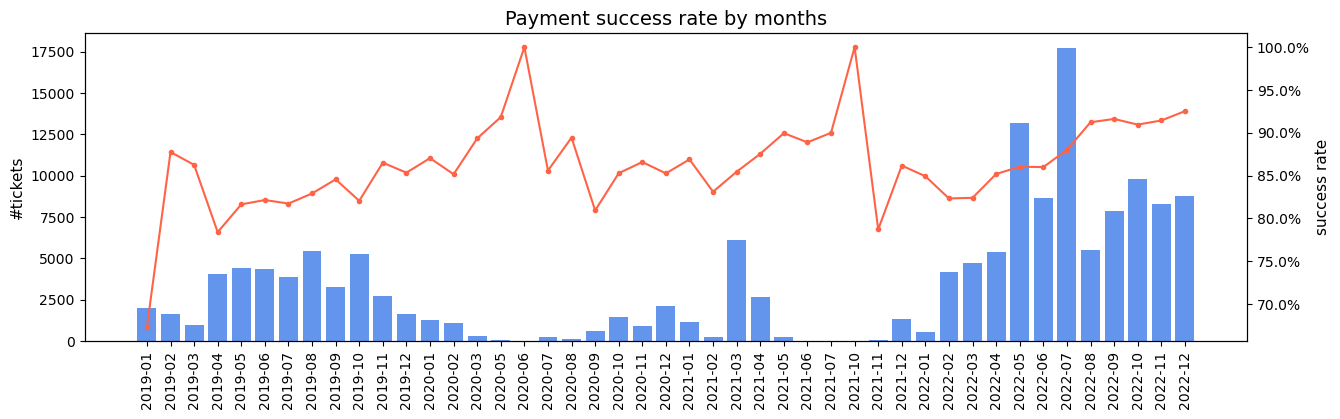

In [141]:
# Vẽ biểu đồ cột và đường

from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'], df_sr['n_ords'], color="cornflowerblue")
plt.ylabel('#tickets', fontsize=11)
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(df_sr['year_month'], df_sr['success_rate'], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate', fontsize=11)
plt.title('Payment success rate by months', fontsize=14)


ERROE TRENDS

In [142]:
df_error_group=(
    df_join_all[df_join_all['status_id'] !=1]
    .groupby(['year_month', 'error_group'])
    .agg(n_ords=('ticket_id','count'))
    .sort_values(by='year_month', ascending=True)
    .reset_index()
)
df_error_group


,year_month,error_group,n_ords
0,2019-01,customer,291
1,2019-01,external,369
2,2019-02,customer,66
3,2019-02,external,133
4,2019-03,customer,44
...,...,...,...
100,2022-11,customer,146
101,2022-11,internal,1
102,2022-12,external,535
103,2022-12,customer,113


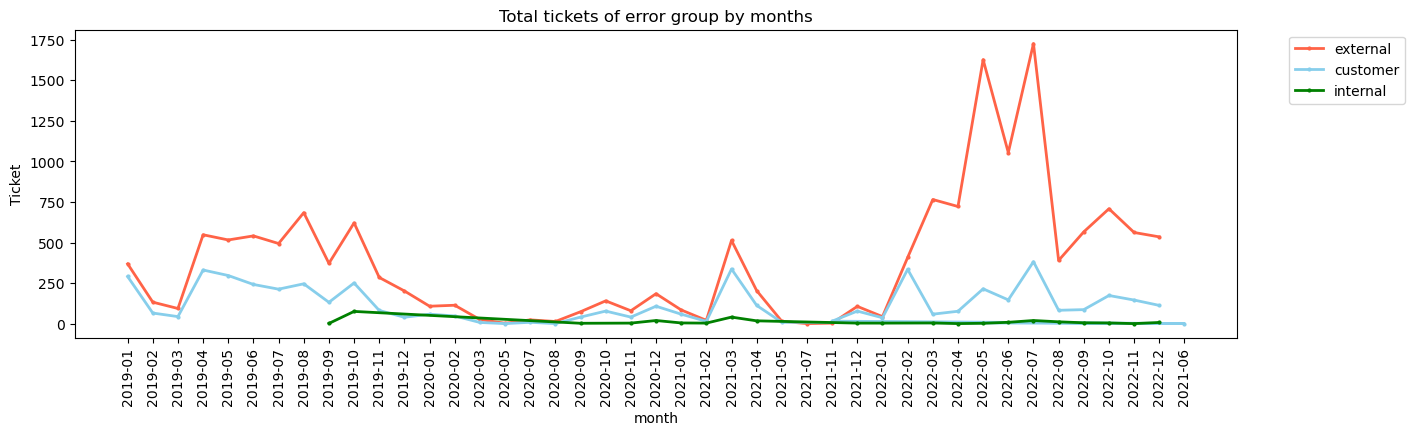

In [146]:
error_color_pairs=[('external','tomato'),('customer','skyblue'),('internal','green')]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
    df_err_line=df_error_group[df_error_group['error_group']==error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize=2)

plt.title('Total tickets of error group by months')
plt.xlabel('month')
plt.ylabel('Ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Lỗi external 2022 tăng đột biến

In [148]:
df_error=(
    df_join_all[df_join_all['status_id'] !=1]
    .groupby(['year_month', 'description'])
    .agg(n_ords=('ticket_id','count'))
    .sort_values(by='year_month', ascending=True)
    .reset_index()
)
df_error['description'].unique()

array(['Insufficient funds in customer account. Please add more funds and try the transaction again.',
       'No response from your bank',
       'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.',
       'Payment failed from bank', 'Payment overdue',
       'Transaction temporarily limited',
       'Need verify your account to continue'], dtype=object)

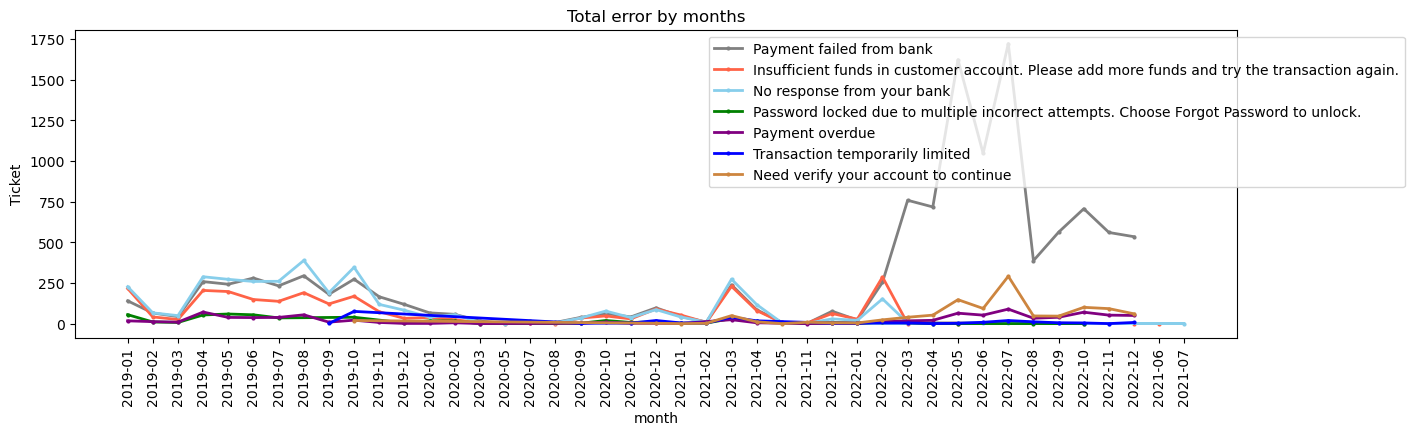

In [152]:
error_color_pairs=[('Payment failed from bank','gray'),
                   ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
                   ('No response from your bank','skyblue'),
                   ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
                   ('Payment overdue','purple'),
                   ('Transaction temporarily limited','blue'),
                   ('Need verify your account to continue','peru')
                   
                   ]

plt.figure(figsize=(15,4))
for error, color in error_color_pairs:
    df_err_line=df_error[df_error['description']==error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize=2)

plt.title('Total error by months')
plt.xlabel('month')
plt.ylabel('Ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)
plt.show()

In [154]:
# Lỗi đến từ ngân hàng tăng đột biến
# 2 lỗi phổ biến nhất là lỗi ngân hàng và không xác thực được tài khoản